# Summary

<p>
This notebook creates workflows from getting data by web scraping and API's to
data visualization.
<p>
    
<p>
The web scraping is done with the Request and BeautifulSoup packages.<br>
The Yahoo finance API "yfinance" is also used here.<br>
The data visualizations are interactive and realized largely Plotly express and Plottly graph objects. The plots are not displayed without browser extensions like Xdocs on Google Chrome."
<p>    

<p>
Some topics explored here are in particular:
</p>

<ul>
  <li>Request methods</li>
  <li>Beautiful soup methods</li>
  <li>data preparation with Pandas</li>
  <li>Plotly customizations</li>
  <li>Bar plots</li>
  <li>Time series line plots</li>
  <li>Box plots</li>
  <li>Scatter plots</li>
  <li>Choropleth plots</li>
  <li>Heatmap plots</li>
</ul> 

# Importing packages

#### Importing base packages

In [633]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import os as os
import time
import pprint
import sys
import re
import json
import itertools
import datetime as dt

In [634]:
now = dt.datetime.now()

In [635]:
cwd=os.getcwd()
print(cwd)

C:\Users\gamarandor\data_science\data_science_projects\data_camp_projects\wiki_webscraping_1


#### Web scraping

In [636]:
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML

#### API's

In [637]:
import yfinance as yf

#### Geographic packages

In [638]:
# geographic
import geopandas as gpd
import json, requests
from shapely.geometry import Point
from shapely.geometry import Polygon, mapping, shape
from shapely.geometry.multipolygon import MultiPolygon
from shapely import wkt
import folium
import fiona; fiona.supported_drivers
import geopy
from geopy.geocoders import Nominatim
from functools import partial
import chardet
import contextily


#### Importing Plotly

In [639]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

# plotly
import plotly
import plotly.express as px
# plotly.tools.set_credentials_file(username = 'lathkar', api_key = '************')

import plotly.io as pio

import chart_studio.plotly as py
import plotly.graph_objects as go


# Set notebook mode to work in offline
import plotly.offline as pyo
pyo.init_notebook_mode()

import plotly.io as pio
print(pio.renderers)

pio.renderers.default = 'jupyterlab'

from plotly.subplots import make_subplots

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



In [640]:
%%capture
! conda list

## Getting the data

<p>
The data is coming from Wikipedia with web scraping and from the toy data sets provided by
plotly express.
</p>

### Web scraping of data tables from Wikipedia
<p>
The standard method to make HTTP requests in Python is the Request package.
<br>
<a href="https://realpython.com/python-requests/" target="_blank">realpython</a> 
</p>

In [641]:
wikipedia_url="https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population"
print(type(wikipedia_url))

<class 'str'>


In [642]:
requests.get(wikipedia_url)

<Response [200]>

#### Checking the success of the request

In [643]:
table_class="wikitable sortable jquery-tablesorter"
response_indycities=requests.get(wikipedia_url)

print(response_indycities.status_code)

200


<p>
The respond 200 indicates that the request was successful and the server delivers
the data requested.<br>
This is not every time the case.
</p>

In [644]:
if response_indycities.status_code == 200:
    print("The request worked!")
elif response_indycities.status_code == 400:
    print("The request did not work!")

The request worked!


In [645]:
if response_indycities:
    print('Success!')
else:
    print('An error has occurred.')

Success!


#### Checking out the content or payload of the request

In [646]:
print(type(response_indycities.content))
print(response_indycities.content[:100])

<class 'bytes'>
b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title'


In [647]:
indycities_text=response_indycities.encoding='utf-8'
indycities_text=response_indycities.text

print(type(indycities_text))
print(indycities_text[:100])

<class 'str'>
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title


In [648]:
response_indycities

<Response [200]>

In [649]:
print(type(response_indycities.headers))
response_indycities.headers['Content-Type']


<class 'requests.structures.CaseInsensitiveDict'>


'text/html; charset=UTF-8'

#### Using BeautifulSoup to extract content from HTML or String objects.
<p>For this data is parsed from the html into a beautifulsoup object.</p>

In [650]:
soup_india_cities = BeautifulSoup(indycities_text, 'html.parser')

<p>BSoup objects are callable by HTML tags.</p> 

In [651]:

print(type(soup_india_cities))
print(soup_india_cities.title)
print(soup_india_cities.title.string)
print(soup_india_cities.title.parent.name)

<class 'bs4.BeautifulSoup'>
<title>List of cities in India by population - Wikipedia</title>
List of cities in India by population - Wikipedia
head


In [652]:
soup_india_cities.body.a

<a id="top"></a>

In [653]:
tag_p = soup_india_cities.p

print(type(tag_p))
print(tag_p.name)
print(tag_p.attrs)
print(tag_p.string)
print(tag_p.get_text())

<class 'bs4.element.Tag'>
p
{}
None
The following tables are the list of cities in India by population. Often cities are bifurcated into multiple regions (municipalities) which results in creation of cities within cities which may figure in the list. The entire work of this article is based on Census of India, 2011, conducted by the Office of the Registrar General and Census Commissioner, under Ministry of Home Affairs (India), Government of India.



In [654]:
soup_india_cities.get_text()[100:130]

'in India by population\n\nFrom W'

<p>Find is finding tags not strings.<br>
   Difference between find and find_all below.</p>

In [655]:
print(type(soup_india_cities.find_all('table')))
soup_india_cities.find_all('br')

<class 'bs4.element.ResultSet'>


[<br/>, <br/>]

In [656]:
find_b=soup_india_cities.find('b')

print(type(find_b))
print(len(find_b))

<class 'bs4.element.Tag'>
1


In [657]:
find_all_b=soup_india_cities.find_all('b')

print(len(find_all_b))
print(find_all_b[:5])

78
[<b>list of cities in India</b>, <b>Class-I towns</b>, <b>Cities</b>, <b>Million Plus UA</b>, <b>Cities</b>]


<p>Find string instead of tags</p>

In [658]:
soup_india_cities.find_all(string=['Mumbai', 'Bangalore', 'Cities'])

['Cities', 'Cities', 'Mumbai', 'Bangalore', 'Cities']

<p>Finding special tags with attributes.</p>

In [659]:
span_attrs=soup_india_cities.find('span', {'class':"mw-headline"} )
span_attrs

<span class="mw-headline" id="Map">Map</span>

<p>This finds the special tag "table" with the class attribute.</p>

In [660]:
cities_india=soup_india_cities.find('table',{'class':"wikitable sortable"})

print(type(cities_india))
print(cities_india.title)
print(cities_india.tr)


<class 'bs4.element.Tag'>
None
<tr>
<th style="width:5%;">Rank
</th>
<th style="width:15%;">City
</th>
<th style="width:25%;">Population<br/>(2011)<sup class="reference" id="cite_ref-Cities1Lakhandabove_3-0"><a href="#cite_note-Cities1Lakhandabove-3">[3]</a></sup>
</th>
<th style="width:25%;">Population<br/>(2001)
</th>
<th style="width:30%;">State or union territory
</th></tr>


#### pandas.read_html
<p>Read HTML tables into a list of DataFrame objects.</p>

In [661]:
cities_india_str=str(cities_india)

In [662]:
cities_india_list=pd.read_html(cities_india_str)
print(type(cities_india_list))

<class 'list'>


<p>Getting the data frame.</p>

In [663]:
cities_india_df=cities_india_list[0]

In [664]:
cities_india_df.rename(columns={'Population(2011)[3]':'Population_2011',
                                'Population(2001)':'Population_2001',
                                'State or union territory':'Territory'}, 
                                inplace=True)

In [665]:
cities_india_df.tail()

Rank            City  Population_2011 Population_2001 Territory
314   315          Tezpur           102505           83028     Assam
315   316   Jehanabad[38]           102456           81503     Bihar
316   317  Aurangabad[39]           101520           79393     Bihar
317   318         Gangtok           100286           29354    Sikkim
318   319   Vasco Da Gama           100000               ―       Goa

In [666]:
cities_india_df.dtypes

Rank                int64
City               object
Population_2011     int64
Population_2001    object
Territory          object
dtype: object

<p>Population_2001 should be a numeric variable.</p>

In [667]:
cities_india_df.isna().sum()

Rank               0
City               0
Population_2011    0
Population_2001    0
Territory          0
dtype: int64

In [668]:
cities_india_df.isnull().sum()

Rank               0
City               0
Population_2011    0
Population_2001    0
Territory          0
dtype: int64

#### Data cleaning

<p>In the Population_2001 column are some characters instead of numbers.<br>
Because of this the variable of type object instead of type numeric.<br>
It is necessary to find and replace the characters for conversion into a numeric.<br>
How to find those?<br>
The to_numeric offers an arguments errors, which returns Nan, if coercion is not possible.
</p>

In [669]:
cities_india_series_coerced_2=\
pd.to_numeric(cities_india_df.Population_2011 , errors="coerce")

print(len(cities_india_series_coerced_2))
print(cities_india_series_coerced_2.isna().sum())
print(cities_india_df.Population_2001.isnull().sum())

319
0
0


In [670]:
cities_india_series_coerced=\
pd.to_numeric(cities_india_df.Population_2001, errors="coerce")

print(len(cities_india_series_coerced))
print(cities_india_series_coerced.isna().sum())
print(cities_india_df.Population_2001.isnull().sum())

319
23
0


In [671]:
cities_india_df_coerced=cities_india_df[cities_india_series_coerced.isna()]

In [672]:
cities_india_df_coerced.head()

Rank              City  Population_2011 Population_2001       Territory
245   246  Khora, Ghaziabad           190400               ―   Uttar Pradesh
269   270             Adoni           166537               ―  Andhra Pradesh
270   271             Udupi           165401               ―       Karnataka
273   274       Mahbubnagar           158000               –       Telangana
278   279          Hindupur           151835               ―  Andhra Pradesh

In [673]:
cities_india_df_coerced.Population_2001.unique()

array(['―', '–'], dtype=object)

In [674]:
coerced_index=cities_india_df_coerced.index.tolist()

print(len((coerced_index)))
print(coerced_index[:5])

23
[245, 269, 270, 273, 278]


In [675]:
cities_india_df.loc[273, "Population_2001"] = '0'

In [676]:
cities_india_df['Population_2001']=cities_india_df['Population_2001'].str.replace('―', '0')
cities_india_df['Population_2001']=cities_india_df['Population_2001'].str.replace('–', '0')

In [677]:
# cities_india_df.replace('–', '0', inplace= True)
# cities_india_df.replace('―', '0', inplace=True)

In [678]:
cities_india_df['Population_2001'].fillna(0, inplace=True)
cities_india_df['Population_2011'].fillna(0, inplace=True)

In [679]:
cities_india_df.isnull().sum()

Rank               0
City               0
Population_2011    0
Population_2001    0
Territory          0
dtype: int64

In [680]:
cities_india_df.isna().sum()

Rank               0
City               0
Population_2011    0
Population_2001    0
Territory          0
dtype: int64

In [681]:
cities_india_df.tail()

Rank            City  Population_2011 Population_2001 Territory
314   315          Tezpur           102505           83028     Assam
315   316   Jehanabad[38]           102456           81503     Bihar
316   317  Aurangabad[39]           101520           79393     Bihar
317   318         Gangtok           100286           29354    Sikkim
318   319   Vasco Da Gama           100000               0       Goa

In [682]:
india_null_1=cities_india_df[cities_india_df['Population_2001']==0]

print(india_null_1.shape)
india_null_1.head()

(0, 5)


Empty DataFrame
Columns: [Rank, City, Population_2011, Population_2001, Territory]
Index: []

In [683]:
cities_india_df.isnull().sum()

Rank               0
City               0
Population_2011    0
Population_2001    0
Territory          0
dtype: int64

In [684]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
     print(cities_india_df[:5])

   Rank       City  Population_2011 Population_2001    Territory
0     1     Mumbai         12442373        11978450  Maharashtra
1     2      Delhi         11007835         9879172        Delhi
2     3  Bangalore          8425970         4301326    Karnataka
3     4  Hyderabad          6809970         3637483    Telangana
4     5  Ahmedabad          5570585         3520085      Gujarat


In [685]:
cities_india_df.set_index('Rank', inplace=True)

In [686]:
cities_india_df['Population_2001']=\
cities_india_df['Population_2001'].astype(int)

In [687]:
cities_india_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 1 to 319
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             319 non-null    object
 1   Population_2011  319 non-null    int64 
 2   Population_2001  319 non-null    int32 
 3   Territory        319 non-null    object
dtypes: int32(1), int64(1), object(2)
memory usage: 11.2+ KB


In [688]:
cities_india_df.head(2)

City  Population_2011  Population_2001    Territory
Rank                                                       
1     Mumbai         12442373         11978450  Maharashtra
2      Delhi         11007835          9879172        Delhi

In [689]:
cities_india_df.to_csv('csv/cities_india_df.csv')

#### Simple data exploration

In [690]:
india_territory=\
cities_india_df.groupby('Territory')['Population_2011'].mean().sort_values(ascending=False)

In [691]:
india_territory.head()

Territory
Delhi               1.764199e+06
Maharashtra         1.189409e+06
Gujarat             1.133445e+06
Uttar Pradesh[5]    1.112544e+06
Karnataka           9.618597e+05
Name: Population_2011, dtype: float64

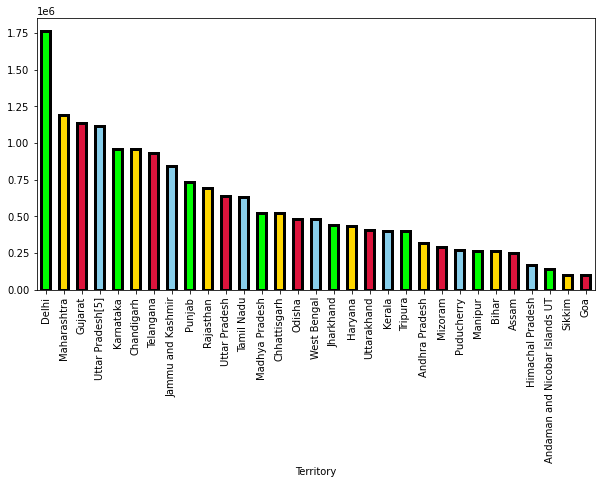

In [692]:
india_territory.plot.bar(figsize=(10,5), 
                         color=['lime', 'gold', 'crimson', 'skyblue'],
                         edgecolor="black", linewidth=3)
plt.show()

In [693]:
india_top_twenty=\
cities_india_df.sort_values(by='Population_2011', ascending=False).iloc[:20, :]

print(type(india_top_twenty))
india_top_twenty.head()

<class 'pandas.core.frame.DataFrame'>


City  Population_2011  Population_2001    Territory
Rank                                                          
1        Mumbai         12442373         11978450  Maharashtra
2         Delhi         11007835          9879172        Delhi
3     Bangalore          8425970          4301326    Karnataka
4     Hyderabad          6809970          3637483    Telangana
5     Ahmedabad          5570585          3520085      Gujarat

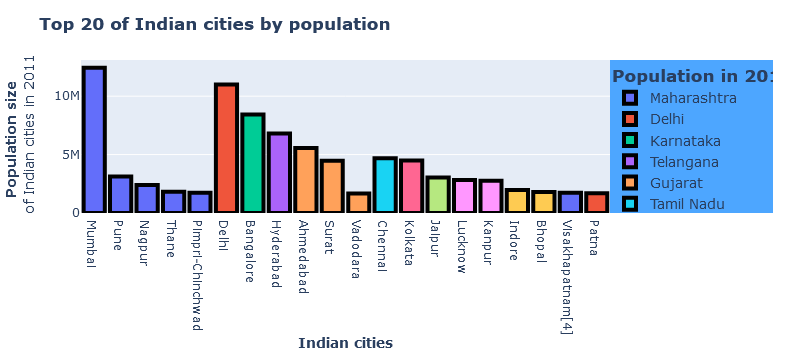

In [694]:
fig_india_20 = px.bar(data_frame=india_top_twenty,
                      x='City', y='Population_2011', hover_name='City',
                      labels={'Population_2011':'<b>Population size</b> <br> of Indian cities in 2011',
                              'City':'<b>Indian cities</b>'},
                      color='Territory') 

fig_india_20.update_layout({'showlegend':True, 
                            'legend':{'title':'<b>Population in 2011</b>', 
                                      'font':{'size':14}, 'x': 1.0, 'y': 1.0,
                                      'bgcolor':'rgb(77,166,255)'},
                            'title':{'text':'<b>Top 20 of Indian cities by population</b>'}})
fig_india_20.update_traces(marker_line_width=4, marker_line_color="black")

fig_india_20.show()

<p>Using a color scale and specifying layout with a dict.</p>

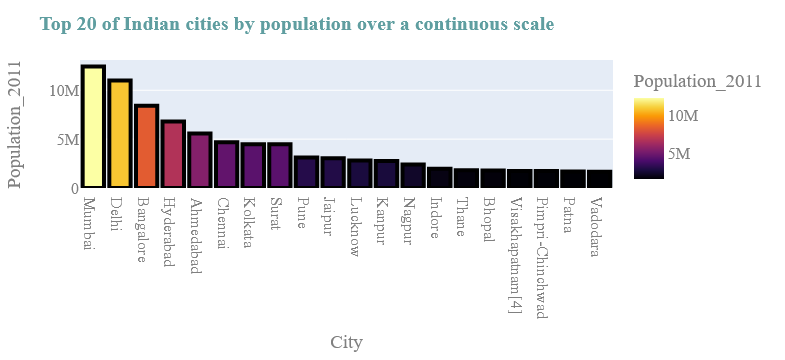

In [695]:
fig_india_21 = px.bar(data_frame=india_top_twenty,
                      x='City', y='Population_2011',
                      color='Population_2011', 
                      color_continuous_scale='inferno') 


# legend does not work
fig_india_21.update_layout({'title': {'text':
                                     '<b>Top 20 of Indian cities by population over a continuous scale</b>',
                                     'font':{'family':'Times New Roman', 'color':'cadetblue', 
                                             'size':20}},
                             'font':{'family':'Times New Roman', 'color':'gray', 'size':16}
                           })

fig_india_21.update_traces(marker_line_width=4, marker_line_color="black")


fig_india_21.show()

#### Using the argument color_discrete_map

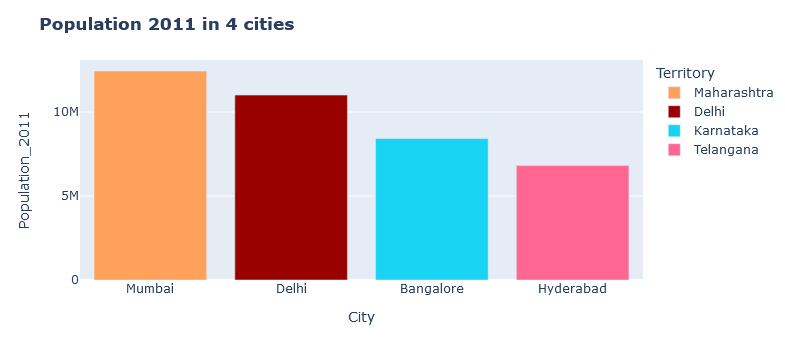

In [696]:
india_4=india_top_twenty[:4]

india_4_color_map={'Mumbai':'rgb(179,179,0)', 'Delhi':'rgb(153,0,0)', 
                   'Bangalore':'rgb(224,230,41)','Hyderabad':'rgb(3, 252, 40)'}

india_4_fig = \
px.bar(data_frame=india_4, x='City',  y='Population_2011',
       color_discrete_map=india_4_color_map, color='Territory', hover_name='City')

india_4_fig.update_layout({'title':{'text':'<b>Population 2011 in 4 cities</b>'}})

india_4_fig.show()

In [697]:
cities_india_df.columns.tolist()

['City', 'Population_2011', 'Population_2001', 'Territory']

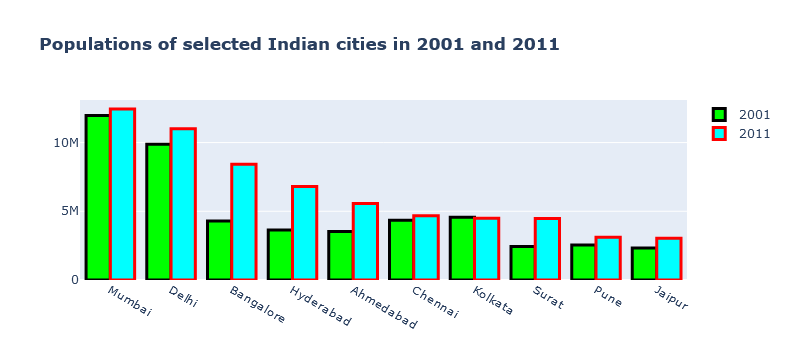

In [698]:
# india_top_twenty

fig_india_20=go.Figure()
fig_india_20.add_trace(go.Bar(x=cities_india_df.loc[:10, 'City'],
                              y=cities_india_df.loc[:10, 'Population_2001'], 
                              name='2001',
                              marker=dict(color="lime"),
                              marker_line_color='black',
                              marker_line_width=3)
                              )             
fig_india_20.add_trace(go.Bar(x=cities_india_df.loc[:10, 'City'],
                              y=cities_india_df.loc[:10, 'Population_2011'], 
                              name='2011',
                              marker=dict(color='cyan'),
                              marker_line_color='red',
                              marker_line_width=3)
                              )

fig_india_20.update_layout({'title': {'text': "<b>Populations of selected Indian cities in 2001 and 2011"}})
                                                
fig_india_20.show()

#### Scatterplot of two variables

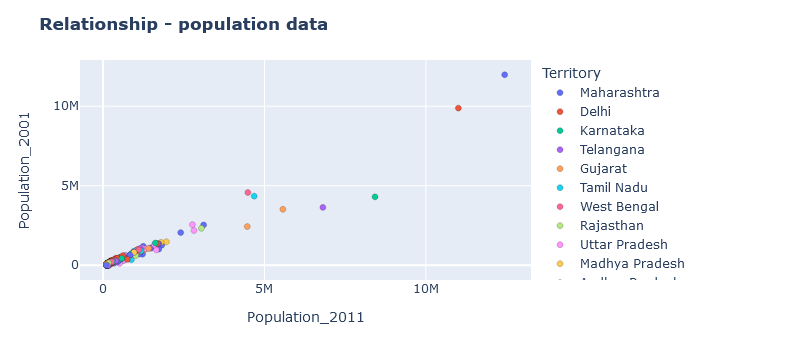

In [699]:
my_scale = ['rgb(255, 0, 0)', 'rgb(3, 252, 40)']

fig_cities_india_df_scatter=\
px.scatter(data_frame=cities_india_df,
           x='Population_2011', y='Population_2001',
           color='Territory', 
           hover_data=['Territory', 'City', 'Population_2011', 'Population_2001'])

fig_cities_india_df_scatter.update_layout({'title':{'text':'<b>Relationship - population data</b>'}})
fig_cities_india_df_scatter.update_traces(marker_line_width=0.2, marker_line_color="black")


fig_cities_india_df_scatter.show()

<p>This plot uses:<br>
<b>plotly.graph_objects: low-level interface to figures, traces and layout</b><br>
plotly.graph_objects contains the building blocks of plotly Figure: traces (Scatter, Bar, …) and Layout<br>
<a href="https://plotly.com/python-api-reference/plotly.graph_objects.html#graph-objects" target="_blank">Plotly</a> 
</p>

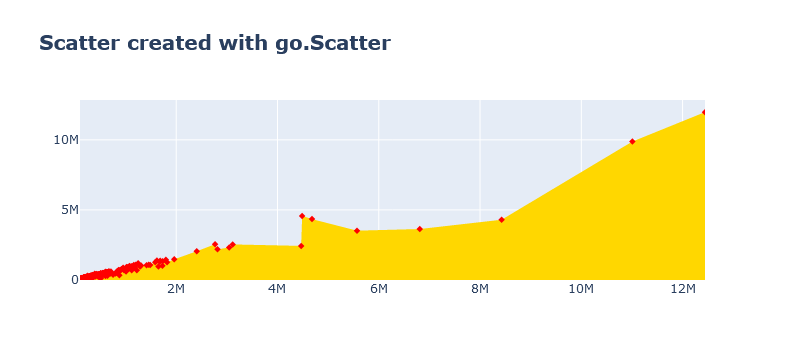

In [700]:
fig_scatter_2=\
go.Figure(go.Scatter(
          x=cities_india_df['Population_2011'],
          y=cities_india_df['Population_2001'], 
          mode='markers',
          fill='tozeroy', fillcolor='gold',
          hovertext=cities_india_df['City'], 
          hoverinfo='text',
          marker={'symbol':'diamond', 'size':5, 'color':'red'}))
fig_scatter_2.update_layout({'title':{'text':'<b>Scatter created with go.Scatter</b>',
                                     'font':{'size':20}}})
fig_scatter_2.show()

#### Distribution of the Population_2011 variable.

In [701]:
print(cities_india_df.Population_2011.sum(axis=0))
print(cities_india_df.Population_2011.median(axis=0))
print(cities_india_df.Population_2011.min(axis=0))
print(cities_india_df.Population_2011.max(axis=0))

205010747
289438.0
100000
12442373


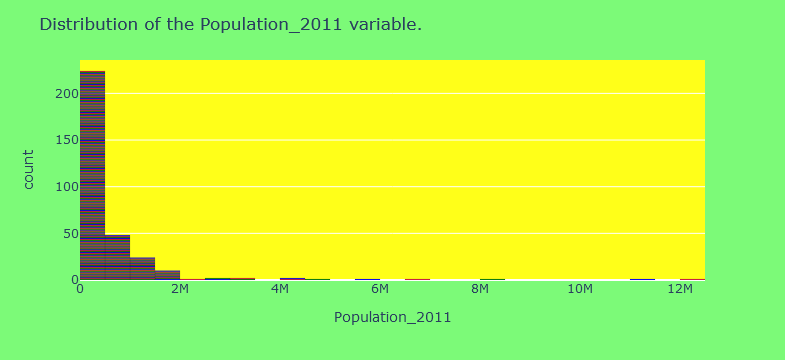

In [702]:
cities_india_df_hist = \
px.histogram(data_frame=cities_india_df, x='Population_2011',
             color_discrete_sequence=["crimson", 'blue', 'green'], color='City', 
             height=300, width=600)

cities_india_df_hist.update_traces(marker_line_width=0.1, marker_line_color='black')
cities_india_df_hist.update_layout(showlegend=False, 
                                   title="Distribution of the Population_2011 variable.",
                                   paper_bgcolor='rgb(124, 250, 120)',
                                   plot_bgcolor='rgb(255,255,25)')    
    
cities_india_df_hist.show()

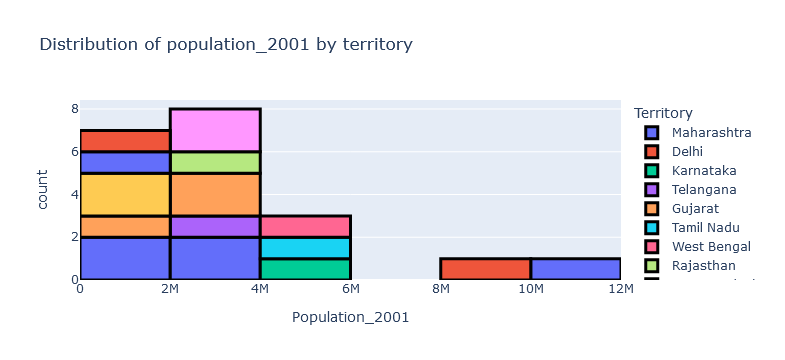

In [703]:
india_top_twenty_hist =\
px.histogram(data_frame=india_top_twenty, x='Population_2001', color='Territory',
             title="Distribution of population_2001 by territory")
india_top_twenty_hist.update_traces(marker_line_width=3, marker_line_color='black')
india_top_twenty_hist.show()

#### Distribution of the Population_2011 variable by territory

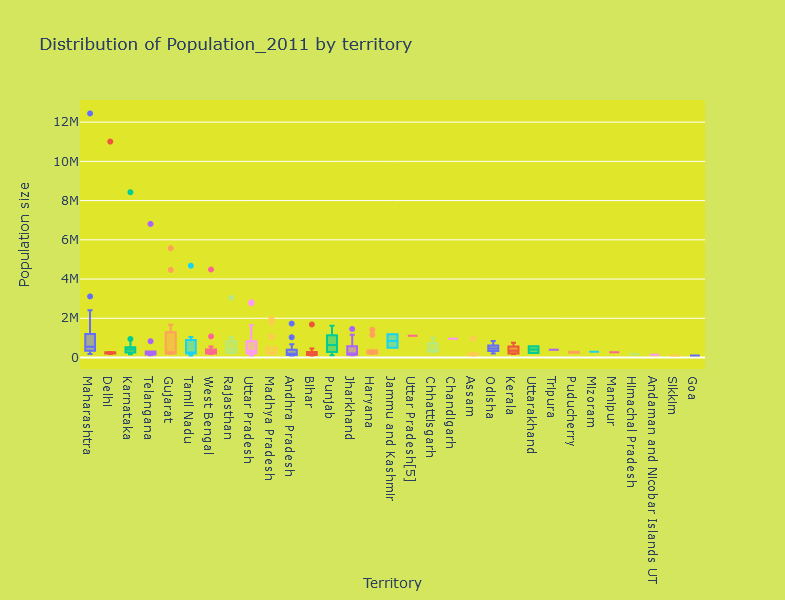

In [704]:
fig_box_1=\
px.box(data_frame=cities_india_df, 
       y='Population_2011', x='Territory', orientation='v', height=600, width=800,
       color='Territory', title='Distribution of Population_2011 by territory')

fig_box_1.update_layout(showlegend=False,
                        paper_bgcolor='rgb(212,230,94)',
                        plot_bgcolor='rgb(224,230,41)', 
                        yaxis_title='Population size')   
fig_box_1.show()

#### List of cities in Brazil by population

In [705]:
brazil_wiki_url="https://en.wikipedia.org/wiki/List_of_cities_in_Brazil_by_population"

In [706]:
response_brazil=requests.get(brazil_wiki_url)

In [707]:
if response_brazil:
    print('Success!')
else:
    print('An error has occurred.')

Success!


In [708]:
brazil_text=response_brazil.encoding='utf-8'
brazil_text=response_brazil.text

print(type(brazil_text))
print(brazil_text[:100])

<class 'str'>
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title


In [709]:
soup_india_cities = BeautifulSoup(indycities_text, 'html.parser')

In [710]:
soup_brazil=BeautifulSoup(brazil_text, 'html.parser')

print(soup_brazil.name)
print(soup_brazil.title)
print(len(soup_brazil))

# soup_brazil

[document]
<title>List of cities in Brazil by population - Wikipedia</title>
3


In [711]:
brazil_cities_table=\
soup_brazil.find('table', {'class':"wikitable sortable mw-datatable static-row-numbers"})
print(type(brazil_cities_table))


<class 'bs4.element.Tag'>


In [712]:
brazil_list=pd.read_html(str(brazil_cities_table))
brazil_df=brazil_list[0]

<p>Some cleaning.</p>

In [713]:
brazil_df.rename(columns={'2020Estimate':'2020_estimate',
                          '2010Census':'2010_census', 
                          'Change':'Change_percent'}, inplace=True)

In [714]:
brazil_df[brazil_df['Change_percent'].str.contains('−', regex=False)]

City  State  2021Estimate  2010_census Change_percent
189  Ilhéus  Bahia        157639       184236        −14.44%

In [715]:
brazil_df['Change_percent']=\
brazil_df['Change_percent'].str.replace('%','', regex=False).str.replace('−', '-').astype(float)

In [716]:
brazil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            326 non-null    object 
 1   State           326 non-null    object 
 2   2021Estimate    326 non-null    int64  
 3   2010_census     326 non-null    int64  
 4   Change_percent  326 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 12.9+ KB


<p>Nearly all cities were expected to grow.</p>

In [717]:
brazil_df.head()

City             State  2021Estimate  2010_census  Change_percent
0       São Paulo         São Paulo      12396372     11253503           10.16
1  Rio de Janeiro    Rio de Janeiro       6775561      6320446            7.20
2        Brasília  Distrito Federal       3094325      2570160           20.39
3        Salvador             Bahia       2900319      2675656            8.40
4       Fortaleza             Ceará       2703391      2452185           10.24

In [718]:
brazil_df[brazil_df.City == 'Ilhéus']

City  State  2021Estimate  2010_census  Change_percent
189  Ilhéus  Bahia        157639       184236          -14.44

In [719]:
brazil_df.to_csv('csv/brazil_df.csv')

### List of countries by carbon dioxide emissions per capita
#### Import data with web scraping

In [720]:
carbon_url="https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions_per_capita"

In [721]:
carbon_response=requests.get(carbon_url)
carbon_text=carbon_response.text

In [722]:
carbon_soup=BeautifulSoup(carbon_text, 'html.parser')

In [723]:
carbon_soup_table=\
carbon_soup.find('table', {'class':"wikitable sortable", "style":"text-align:right;"})

In [724]:
carbon_list=pd.read_html(str(carbon_soup_table))
carbon_df=carbon_list[0]

In [725]:
carbon_df.head(2)

Unnamed: 0 1980 1985 1990 1995 2000 2008 2009 2010 2011 2012 2013 2014  \
0  Afghanistan  0.1  0.3  0.2  0.1  0.0  0.2  0.2  0.3  0.4  0.4  0.3  0.3   
1      Albania  1.9  2.7  1.7  0.7  1.0  1.5  1.5  1.6  1.8  1.7  1.7  2.0   

  2015 2018  
0  0.3  0.3  
1  1.6  1.6

<p>The numbers are objects.</p>

In [726]:
carbon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  223 non-null    object
 1   1980        223 non-null    object
 2   1985        223 non-null    object
 3   1990        223 non-null    object
 4   1995        223 non-null    object
 5   2000        223 non-null    object
 6   2008        223 non-null    object
 7   2009        223 non-null    object
 8   2010        223 non-null    object
 9   2011        223 non-null    object
 10  2012        223 non-null    object
 11  2013        223 non-null    object
 12  2014        223 non-null    object
 13  2015        223 non-null    object
 14  2018        223 non-null    object
dtypes: object(15)
memory usage: 26.3+ KB


#### Data Cleaning
There is a string '..', which prevents converting to float.</p>

In [727]:
carbon_cols=carbon_df.columns[1:15].to_list()

In [728]:
for col in carbon_cols:
    carbon_df[col]=carbon_df[col].str.replace('..', '0', regex=False)

In [729]:
for col in carbon_cols:
    # print(carbon_df[col])
    carbon_df[col]=carbon_df[col].astype(float)

In [730]:
carbon_df.rename({'Unnamed: 0':'Country'}, axis=1, inplace=True)

In [731]:
carbon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  223 non-null    object 
 1   1980     223 non-null    float64
 2   1985     223 non-null    float64
 3   1990     223 non-null    float64
 4   1995     223 non-null    float64
 5   2000     223 non-null    float64
 6   2008     223 non-null    float64
 7   2009     223 non-null    float64
 8   2010     223 non-null    float64
 9   2011     223 non-null    float64
 10  2012     223 non-null    float64
 11  2013     223 non-null    float64
 12  2014     223 non-null    float64
 13  2015     223 non-null    float64
 14  2018     223 non-null    float64
dtypes: float64(14), object(1)
memory usage: 26.3+ KB


In [732]:
carbon_df.head(3)

Country  1980  1985  1990  1995  2000  2008  2009  2010  2011  2012  \
0  Afghanistan   0.1   0.3   0.2   0.1   0.0   0.2   0.2   0.3   0.4   0.4   
1      Albania   1.9   2.7   1.7   0.7   1.0   1.5   1.5   1.6   1.8   1.7   
2      Algeria   3.4   3.2   3.0   3.3   2.8   3.2   3.4   3.3   3.3   3.5   

   2013  2014  2015  2018  
0   0.3   0.3   0.3   0.3  
1   1.7   2.0   1.6   1.6  
2   3.5   3.7   3.9   3.9

#### Data visualization

In [733]:
carbon_df_countries=carbon_df.Country.unique().tolist()

<p>Countries to index for subsetting with loc.</p>

In [734]:
carbon_df_selection_1=carbon_df.set_index('Country', drop=True)
carbon_df_selection_1.head(1)

1980  1985  1990  1995  2000  2008  2009  2010  2011  2012  2013  \
Country                                                                         
Afghanistan   0.1   0.3   0.2   0.1   0.0   0.2   0.2   0.3   0.4   0.4   0.3   

             2014  2015  2018  
Country                        
Afghanistan   0.3   0.3   0.3

<p>Selecting countries for plot.</p>

In [735]:
carbon_countries_selection=\
carbon_df_selection_1.loc[[ 'United Kingdom',
 'United States',
 'Russia',
 'Germany',
 'China',
 'Vietnam',
 'Japan',
 'France'], ['2015', '2018']]

In [736]:
carbon_countries_selection.head(2)

2015  2018
Country                   
United Kingdom   6.3   5.6
United States   16.3  16.1

In [737]:
carbon_countries_selection_index=\
carbon_countries_selection.index.tolist()

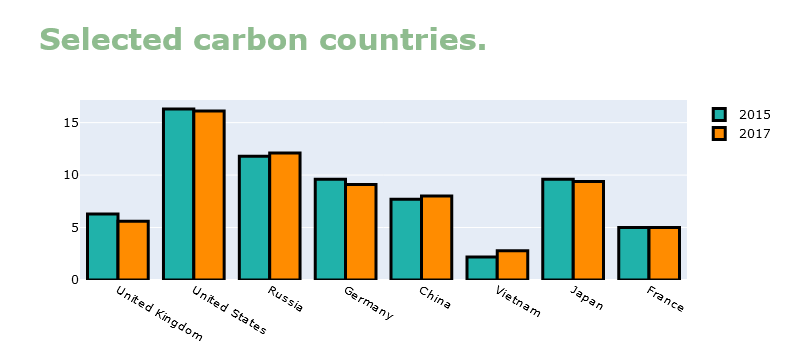

In [738]:
fig_carbon_1=go.Figure()
fig_carbon_1.add_trace(
go.Bar(x=carbon_countries_selection_index, y=carbon_countries_selection['2015'], 
       name='2015',
       marker=dict(color="LightSeaGreen"))
)

fig_carbon_1.add_trace(
go.Bar(x=carbon_countries_selection_index, y=carbon_countries_selection['2018'], 
       name='2017',
       marker=dict(color="darkorange"))
)

fig_carbon_1.update_traces(marker_line_color='black',
                           marker_line_width=3)

fig_carbon_1.update_layout(title="<b>Selected carbon countries.</b>", 
                           title_font_color='darkseagreen',
                           title_font_size=30,
                           font_color='black')

fig_carbon_1.show()

In [739]:
carbon_df.to_csv('csv/carbon_df.csv')

### Arrondissements of Paris
<a href="https://en.wikipedia.org/wiki/Arrondissements_of_Paris" target="_blank">Wikipedia</a> 
#### Importing data with web scraping


In [740]:
paris_url="https://en.wikipedia.org/wiki/Arrondissements_of_Paris"

In [741]:
paris_response=requests.get(paris_url)

In [742]:
if paris_response.status_code == 200:
    print("Request successfully!")
elif paris_response.status_code == 400:
    print("Request not successfully!")

Request successfully!


In [743]:
print(type(paris_response))
print(type(paris_response.content))

paris_content=paris_response.content
paris_content_str=str(paris_content)

print(paris_content_str[:100])

<class 'requests.models.Response'>
<class 'bytes'>
b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n


In [744]:
paris_headers=paris_response.headers

print(type(paris_headers))
print(type(paris_headers.keys()))

print(paris_headers['Content-Language'])

<class 'requests.structures.CaseInsensitiveDict'>
<class 'collections.abc.KeysView'>
en


In [745]:
paris_selected_keys={'Content-Language', 'P3p', 'Vary', 'Content-Type', 'Report-To'}

paris_selected_keys_dict=\
{key:value for key,value in paris_headers.items() if key in paris_selected_keys}

paris_selected_keys_dict

{'Vary': 'Accept-Encoding,Cookie,Authorization',
 'P3p': 'CP="See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."',
 'Content-Language': 'en',
 'Content-Type': 'text/html; charset=UTF-8',
 'Report-To': '{ "group": "wm_nel", "max_age": 86400, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }'}

In [746]:
paris_text=paris_response.text
print(type(paris_text))
print(paris_text[:100])

<class 'str'>
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title


In [747]:
paris_soup=BeautifulSoup(paris_text, 'html.parser')

In [748]:
print(paris_soup.title)
print(paris_soup.title.name)

<title>Arrondissements of Paris - Wikipedia</title>
title


In [749]:
print(paris_soup.p.name)
print(str(paris_soup.p)[:100])


p
<p>The city of <a href="/wiki/Paris" title="Paris">Paris</a> is divided into twenty <i><a href="/wik


In [750]:
paris_text_soup=paris_soup.get_text()[1000:1100]
paris_text_soup

' is indicated by the last two digits in most Parisian postal codes (75001 up to 75020). In addition '

In [751]:
paris_table=paris_soup.find('table', {"class":"wikitable sortable"})

In [752]:
paris_table_str=str(paris_table)
print(type(paris_table_str))
print(paris_table_str[1200:1300])

<class 'str'>
edia.org/wikipedia/commons/thumb/b/bf/Ariel_Weil_en_2017_%C3%A0_la_Mairie_du_4e_arrondissement_de_Pa


In [753]:
paris_list=pd.read_html(paris_table_str)
paris_df=paris_list[0]

#### Data exploring

In [754]:
print(type(paris_df))
print(paris_df.shape)
print(paris_df.info())


<class 'pandas.core.frame.DataFrame'>
(20, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Arrondissement (R for Right Bank, L for Left Bank)  20 non-null     object
 1   Name                                                20 non-null     object
 2   Area (km2)                                          20 non-null     object
 3   Population(2017 estimate)                           20 non-null     int64 
 4   Density (2017)(inhabitants per km2)                 20 non-null     object
 5   Peak of population                                  20 non-null     object
 6   Mayor (2020-2026)                                   20 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.2+ KB
None


In [755]:
print(paris_df.head(2))

  Arrondissement (R for Right Bank, L for Left Bank)    Name  \
0    1st(Ier) RAdministratively part of Paris Centre  Louvre   
1   2nd (IIe) RAdministratively part of Paris Centre  Bourse   

              Area (km2)  Population(2017 estimate)  \
0  5.59 km2 (2.16 sq mi)                     100196   
1  5.59 km2 (2.16 sq mi)                     100196   

  Density (2017)(inhabitants per km2) Peak of population Mayor (2020-2026)  
0                               17924        before 1861   Ariel Weil (PS)  
1                               17924        before 1861   Ariel Weil (PS)  


#### Data cleaning.

In [756]:
paris_df.rename({'Arrondissement (R for Right Bank, L for Left Bank)':'Arrondissement',
                'Area (km2)':'Area_km2',
                'Population(2017 estimate)':'Population_2017',
                'Density (2017)(inhabitants per km2)':'Density_km2',
                'Peak of population':'Population_peak',
                'Mayor (2020-2026)':'Mayor'},
                axis=1,
                inplace=True)

<p>Splitting the 'Area_km2' column.</p>

In [757]:
paris_df[['Area_km2', 'Area_sqm']]=paris_df['Area_km2'].str.split('(',1, expand=True)

In [758]:
paris_df['Area_km2'] = paris_df['Area_km2'].str.replace('km2', '', regex=False).str.strip()

<p>Replacing values with numerics as strings.<br>
This makes conversion to floats possible.</p>

In [759]:
paris_df.loc[5, 'Area_sqm'] = '0.832'

In [760]:
paris_df.loc[11, 'Area_sqm'] = '2.462'

In [761]:
paris_df.loc[15, 'Area_sqm'] = '3.029'

<p>The replacement of "sq mi)" did only works this way here.
Why is not clear?</p>

In [762]:
paris_df['Area_sqm']=\
paris_df['Area_sqm'].str.replace(re.escape(')'), '', regex=True)

In [763]:
paris_df['Area_sqm']=\
paris_df['Area_sqm'].str.replace('sq', '', regex=False)

In [764]:
paris_df['Area_sqm']=\
paris_df['Area_sqm'].str.replace('mi', '', regex=False).str.strip()

<p>Density_km2</p>

In [765]:
paris_df.loc[11, 'Density_km2'] = 21729
paris_df.loc[15, 'Density_km2'] = 19054

<p>Mayor</p>

In [766]:
paris_df[['Mayor', 'Mayor_party']] = paris_df['Mayor'].str.split('(',1, expand=True)

In [767]:
paris_df['Mayor_party'] = paris_df['Mayor_party'].str.replace(")", "", regex=False)

<p>Converting to float.</p>

In [768]:
# paris_df.columns

In [769]:
paris_df=\
paris_df[['Arrondissement', 'Name', 'Area_km2', 'Population_2017', 'Density_km2', 
         'Population_peak',  'Area_sqm', 'Mayor', 'Mayor_party']]

In [770]:
paris_floats=['Area_km2', 'Population_2017', 'Density_km2', 'Area_sqm']
paris_df[paris_floats]=paris_df[paris_floats].astype(float)

In [771]:
paris_df.dtypes

Arrondissement      object
Name                object
Area_km2           float64
Population_2017    float64
Density_km2        float64
Population_peak     object
Area_sqm           float64
Mayor               object
Mayor_party         object
dtype: object

In [772]:
paris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Arrondissement   20 non-null     object 
 1   Name             20 non-null     object 
 2   Area_km2         20 non-null     float64
 3   Population_2017  20 non-null     float64
 4   Density_km2      20 non-null     float64
 5   Population_peak  20 non-null     object 
 6   Area_sqm         20 non-null     float64
 7   Mayor            20 non-null     object 
 8   Mayor_party      20 non-null     object 
dtypes: float64(4), object(5)
memory usage: 1.5+ KB


In [773]:
paris_df.head(3)

Arrondissement    Name  Area_km2  \
0    1st(Ier) RAdministratively part of Paris Centre  Louvre      5.59   
1   2nd (IIe) RAdministratively part of Paris Centre  Bourse      5.59   
2  3rd (IIIe) RAdministratively part of Paris Centre  Temple      5.59   

   Population_2017  Density_km2 Population_peak  Area_sqm        Mayor  \
0         100196.0      17924.0     before 1861      2.16  Ariel Weil    
1         100196.0      17924.0     before 1861      2.16  Ariel Weil    
2         100196.0      17924.0     before 1861      2.16  Ariel Weil    

  Mayor_party  
0          PS  
1          PS  
2          PS

In [774]:
paris_df.to_csv('csv/paris_df.csv')

#### Data exploration

In [775]:
paris_pop=paris_df.groupby('Name')['Population_2017'].sum()

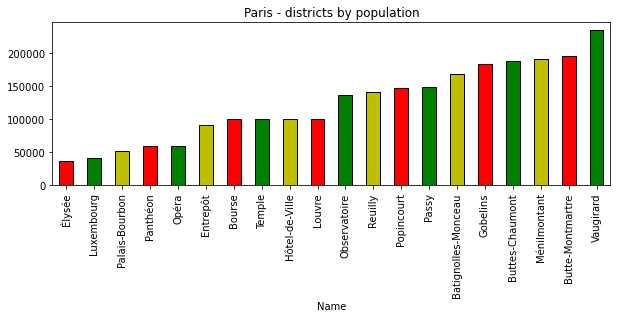

In [776]:
paris_pop.sort_values().plot.bar(edgecolor='black', color=['r', 'g', 'y'], figsize=(10,3),
                                 title="Paris - districts by population")
plt.show()

In [777]:
paris_pop_df_2=paris_pop.reset_index(drop=False)
paris_pop_df_2.head(1)

Name  Population_2017
0  Batignolles-Monceau         168737.0

#### Data visualization

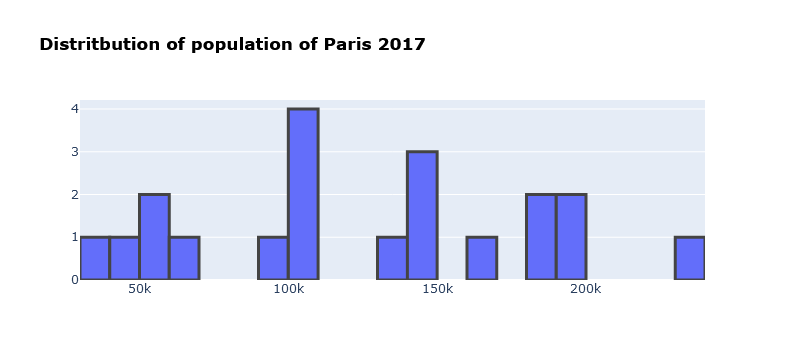

In [778]:
fig_paris_pop_hist_2=go.Figure()

fig_paris_pop_hist_2.add_trace(
go.Histogram(histfunc='count', x=paris_df.Population_2017, nbinsx=20, name='pop'))

fig_paris_pop_hist_2.update_traces(marker_line_width=3)
fig_paris_pop_hist_2.update_layout({'title':{'text':"<b>Distritbution of population of Paris 2017", 
                                          'font':{'size':17, 'color':'black'}}})


fig_paris_pop_hist_2.show()

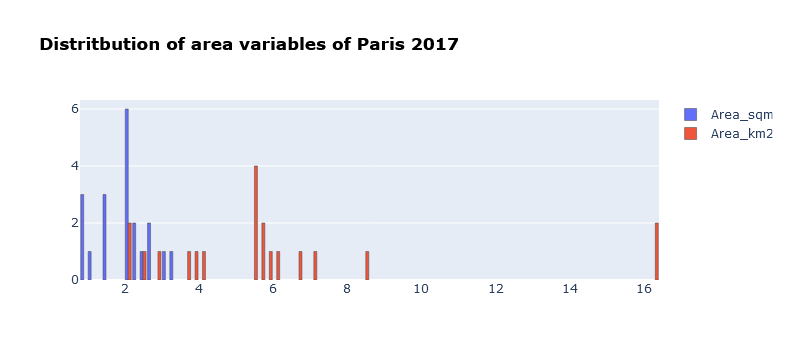

In [779]:
fig_paris_pop_hist_2=go.Figure()

fig_paris_pop_hist_2.add_trace(
go.Histogram(histfunc='count', x=paris_df.Area_sqm, nbinsx=100, name='Area_sqm'))

fig_paris_pop_hist_2.add_trace(
go.Histogram(histfunc='count', x=paris_df.Area_km2, nbinsx=10, name='Area_km2'))


fig_paris_pop_hist_2.update_traces(marker_line_width=0.5)
fig_paris_pop_hist_2.update_layout({'title':{'text':"<b>Distritbution of area variables of Paris 2017", 
                                          'font':{'size':17, 'color':'black'}}})


fig_paris_pop_hist_2.show()

In [780]:
arond=\
gpd.read_file('geodata/arrondissements.geojson', encoding='utf-8')

In [781]:
arond.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   n_sq_co    20 non-null     int64   
 1   perimetre  20 non-null     float64 
 2   l_ar       20 non-null     object  
 3   surface    20 non-null     float64 
 4   n_sq_ar    20 non-null     int64   
 5   l_aroff    20 non-null     object  
 6   c_arinsee  20 non-null     int64   
 7   c_ar       20 non-null     int64   
 8   geometry   20 non-null     geometry
dtypes: float64(2), geometry(1), int64(4), object(2)
memory usage: 1.5+ KB


In [782]:
arond.head(1)

n_sq_co    perimetre        l_ar       surface    n_sq_ar  \
0  750001537  9916.464176  18ème Ardt  5.996051e+06  750000018   

             l_aroff  c_arinsee  c_ar  \
0  Buttes-Montmartre      75118    18   

                                            geometry  
0  POLYGON ((2.36580 48.88554, 2.36469 48.88437, ...

In [783]:
arond.l_aroff.sort_values().unique().tolist()[:5]

['Batignolles-Monceau',
 'Bourse',
 'Buttes-Chaumont',
 'Buttes-Montmartre',
 'Entrepôt']

In [784]:
arond_names_1=arond.l_aroff.sort_values().unique().tolist()
arond_names_2=paris_df.Name.sort_values().unique().tolist()
arond_names_1==arond_names_2


False

In [785]:
arond_names_dict = {'Arond_1': arond_names_1, 'Arond_2': arond_names_2}

arond_names_df = pd.DataFrame(arond_names_dict )
arond_names_df.head(1)

Arond_1              Arond_2
0  Batignolles-Monceau  Batignolles-Monceau

In [786]:
def compare(row, var1, var2):
    if row['Arond_1'] == row['Arond_2']:
        value=1
    else:
        value=0
    return value

arond_names_df['Match?'] = arond_names_df.apply(compare, args=('Arond_1', 'Arond_2'), axis=1)
print(arond_names_df.shape[0]-arond_names_df['Match?'].sum())
arond_names_df.head(3)

2


Arond_1              Arond_2  Match?
0  Batignolles-Monceau  Batignolles-Monceau       1
1               Bourse               Bourse       1
2      Buttes-Chaumont     Butte-Montmartre       0

In [787]:
arond_names_df[arond_names_df['Match?']==0]

Arond_1           Arond_2  Match?
2    Buttes-Chaumont  Butte-Montmartre       0
3  Buttes-Montmartre   Buttes-Chaumont       0

In [788]:
arond.loc[2, 'l_aroff'] = "Buttes-Chaumont"
arond.loc[3, 'l_aroff'] = "Buttes-Montmartre"

In [789]:
arond.loc[[2,3], ['l_aroff', 'geometry']]

l_aroff                                           geometry
2    Buttes-Chaumont  POLYGON ((2.36469 48.88437, 2.36485 48.88436, ...
3  Buttes-Montmartre  POLYGON ((2.36443 48.84614, 2.36484 48.84584, ...

In [790]:
arond.head(1)
paris_df.head(1)

Arrondissement    Name  Area_km2  \
0  1st(Ier) RAdministratively part of Paris Centre  Louvre      5.59   

   Population_2017  Density_km2 Population_peak  Area_sqm        Mayor  \
0         100196.0      17924.0     before 1861      2.16  Ariel Weil    

  Mayor_party  
0          PS

In [791]:
paris_merged=paris_df.merge(arond, left_on='Name', right_on='l_aroff')

print(paris_df.shape)
print(paris_merged.shape)
paris_merged.info()

(20, 9)
(18, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Arrondissement   18 non-null     object  
 1   Name             18 non-null     object  
 2   Area_km2         18 non-null     float64 
 3   Population_2017  18 non-null     float64 
 4   Density_km2      18 non-null     float64 
 5   Population_peak  18 non-null     object  
 6   Area_sqm         18 non-null     float64 
 7   Mayor            18 non-null     object  
 8   Mayor_party      18 non-null     object  
 9   n_sq_co          18 non-null     int64   
 10  perimetre        18 non-null     float64 
 11  l_ar             18 non-null     object  
 12  surface          18 non-null     float64 
 13  n_sq_ar          18 non-null     int64   
 14  l_aroff          18 non-null     object  
 15  c_arinsee        18 non-null     int64   
 16  c_ar             18 non-null 

In [792]:
paris_merged.drop(16, axis=0, inplace=True)

In [793]:
paris_merged[['Name', 'l_aroff']].tail(3)

Name              l_aroff
14  Batignolles-Monceau  Batignolles-Monceau
15      Buttes-Chaumont      Buttes-Chaumont
17         Ménilmontant         Ménilmontant

In [794]:
paris_geometry_pop=\
paris_merged[['Name', 'Population_2017','geometry']]
paris_geometry_pop.head(1)

Name  Population_2017                                           geometry
0  Louvre         100196.0  POLYGON ((2.32801 48.86992, 2.32997 48.86851, ...

In [795]:
paris_gdf_1 = gpd.GeoDataFrame(paris_geometry_pop, geometry='geometry')

In [796]:
print(type(paris_gdf_1))
paris_gdf_1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17 entries, 0 to 17
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             17 non-null     object  
 1   Population_2017  17 non-null     float64 
 2   geometry         17 non-null     geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 544.0+ bytes


<p>Looking into the Json representation of the geo dataframe.</p>

In [797]:
gdf_json_stringobject=paris_gdf_1.to_json()
gdf_json_stringobject[:300]

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"Name": "Louvre", "Population_2017": 100196.0}, "geometry": {"type": "Polygon", "coordinates": [[[2.328007329038849, 48.86991742140716], [2.329965588686571, 48.86851416917428], [2.330306795320875, 48.86835619167'

In [798]:
paris_gdf_1.to_file('geodata/paris_gdf_1.geojson', driver='GeoJSON', encoding='utf-8')  
paris_gdf_1_geojson = gpd.read_file("geodata/paris_gdf_1.geojson", encoding='utf-8')
paris_gdf_1_geojson.head(1)

Name  Population_2017                                           geometry
0  Louvre         100196.0  POLYGON ((2.32801 48.86992, 2.32997 48.86851, ...

In [799]:
paris_gdf_1_geojson_2 = open('geodata/paris_gdf_1.geojson')
paris_gdf_1_geojson_2_data = json.load(paris_gdf_1_geojson_2)

for i in paris_gdf_1_geojson_2_data['features'][0]:
    print(i)
    
for i in paris_gdf_1_geojson_2_data['features'][0]['properties']:
    print(i)    
paris_gdf_1_geojson_2.close()

type
properties
geometry
Name
Population_2017


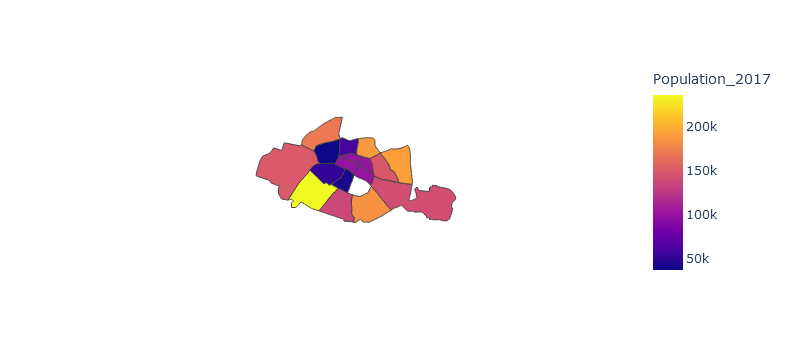

In [800]:
# https://plotly.com/python/choropleth-maps/
fig = px.choropleth(paris_gdf_1,
                    geojson=paris_gdf_1.geometry,
                    locations=paris_gdf_1.index,
                    color="Population_2017",
                    projection="mercator",
                    hover_name='Name')
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

<p>Plotting choropleth of Paris on the Mapbox map</p>

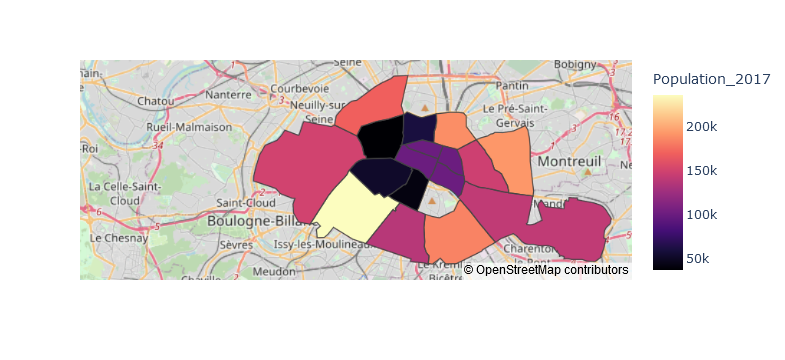

0.40000414848327637


In [801]:
begin_plotly_2=time.time()

fig = px.choropleth_mapbox(paris_gdf_1,
                           geojson=paris_gdf_1.geometry,
                           locations=paris_gdf_1.index,
                           color="Population_2017",
                           center={"lat": 48.858370, "lon": 2.294481},
                           mapbox_style="open-street-map",
                           color_continuous_scale='Magma',
                           zoom=10,
                           hover_name='Name')

fig.show('jupyterlab')

end_plotly_2=time.time()
time.sleep(1)

runtime_plotly_2=end_plotly_2-begin_plotly_2
print(runtime_plotly_2)

### Past military expenditure by country 1987 - 1989
#### Importing data with web scraping

In [802]:
military="https://en.wikipedia.org/wiki/Past_military_expenditure_by_country"

In [803]:
military_response=requests.get(military)

In [804]:
military_text=military_response.text

In [805]:
military_soup=BeautifulSoup(military_text, "html.parser")

In [806]:
military_tables=\
military_soup.find_all('table')

In [807]:
military_tables_list=pd.read_html(str(military_tables))

In [808]:
military_tables_0 = military_tables_list[0]
military_tables_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  19 non-null     object 
 1   1987     18 non-null     float64
 2   1988     18 non-null     float64
 3   1989     19 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 736.0+ bytes


In [809]:
military_tables_0 = military_tables_list[0]
military_tables_0.head(5)

Country     1987     1988   1989
0  Australia.mw-parser-output .hatnote{font-style...   5057.0   5836.0   6300
1                                      Brazil (more)   4324.0   5874.0   8761
2                                      Canada (more)   8694.0   9897.0  10747
3                                       China (more)      NaN      NaN  11403
4                                      France (more)  29280.0  30327.0  29666

In [810]:
military_tables_0.isna().sum()

Country    0
1987       1
1988       1
1989       0
dtype: int64

In [811]:
military_tables_0.loc[0, 'Country'] = 'Australia'
military_tables_0.loc[0, 'Country']

'Australia'

In [812]:
military_tables_0['Country']=\
military_tables_0['Country'].str.replace("(more)", "", regex=False).str.strip()

In [813]:
military_tables_0.fillna(0, inplace=True)

In [814]:
military_tables_0.head(2)

Country    1987    1988  1989
0  Australia  5057.0  5836.0  6300
1     Brazil  4324.0  5874.0  8761

#### Military: 1990 - 1999

In [815]:
military_tables_1 = military_tables_list[1]
military_tables_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  18 non-null     object 
 1   1990     17 non-null     float64
 2   1991     16 non-null     float64
 3   1992     16 non-null     float64
 4   1993     17 non-null     float64
 5   1994     17 non-null     float64
 6   1995     17 non-null     float64
 7   1996     17 non-null     float64
 8   1997     17 non-null     float64
 9   1998     17 non-null     float64
 10  1999     17 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.7+ KB


In [816]:
military_tables_1['Country']=\
military_tables_1['Country'].str.replace("(more)", "", regex=False)

In [817]:
military_tables_1.head(3)

Country     1990     1991     1992     1993     1994     1995     1996  \
0  Australia    6704.0   7024.0   6882.0   6734.0   7460.0   7666.0   8203.0   
1     Brazil    9236.0   6695.0   4994.0   7100.0  10591.0  14319.0  14073.0   
2     Canada   11415.0  11339.0  10789.0  10269.0   9577.0   9177.0   8616.0   

      1997      1998    1999  
0   7937.0      7.18  7770.0  
1  13934.0  14357.00  9867.0  
2   7945.0   7749.00  8211.0

In [818]:
military_tables_1.isna().sum()

Country    0
1990       1
1991       2
1992       2
1993       1
1994       1
1995       1
1996       1
1997       1
1998       1
1999       1
dtype: int64

In [819]:
military_tables_1.fillna(0, inplace=True)

#### Military: 2000 - 2009

In [820]:
military_tables_2=military_tables_list[2]

In [821]:
military_tables_2.iloc[:, 1:11]=military_tables_2.iloc[:, 1:11].astype(float)

In [822]:
military_tables_2['Country']=\
military_tables_2['Country'].str.replace("(more)", "", regex=False).str.strip()

In [823]:
military_tables_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  18 non-null     object 
 1   2000     18 non-null     float64
 2   2001     18 non-null     float64
 3   2002     18 non-null     float64
 4   2003     18 non-null     float64
 5   2004     18 non-null     float64
 6   2005     18 non-null     float64
 7   2006     18 non-null     float64
 8   2007     18 non-null     float64
 9   2008     18 non-null     float64
 10  2009     18 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.7+ KB


In [824]:
military_tables_2.head(2)

Country     2000     2001    2002    2003     2004     2005     2006  \
0  Australia   7274.0   7043.0  7947.0  9927.0  11995.0  13238.0  14240.0   
1     Brazil  11344.0  10930.0  9665.0  8393.0   9780.0  13589.0  16405.0   

      2007     2008     2009  
0  17186.0  18633.0  18960.0  
1  20486.0  24453.0  25649.0

In [825]:
military_tables_2.isna().sum()

Country    0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
dtype: int64

#### Military: 2010 - 2019

In [826]:
military_tables_3=military_tables_list[3]
military_tables_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  18 non-null     object 
 1   2010     18 non-null     int64  
 2   2011     18 non-null     int64  
 3   2012     18 non-null     int64  
 4   2013     18 non-null     int64  
 5   2014     18 non-null     int64  
 6   2015     18 non-null     object 
 7   2016     18 non-null     object 
 8   2017     18 non-null     object 
 9   2018     17 non-null     float64
 10  2019     17 non-null     float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.7+ KB


In [827]:
military_tables_3.fillna(0, inplace=True)

In [828]:
military_tables_3.isnull().sum()

Country    0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
dtype: int64

In [829]:
military_tables_3['Country']=\
military_tables_3['Country'].str.replace("(more)","", regex=False).str.strip()

In [830]:
military_tables_3.head(2)

Country   2010   2011   2012   2013   2014   2015   2016   2017     2018  \
0  Australia  23218  26597  26217  24825  25784  24046  26383  27691  26840.0   
1     Brazil  34003  36936  33987  32875  32660  24618  24225  29283  28177.0   

      2019  
0  25912.0  
1  26946.0

#### Data cleaning

#### Replacing hyphens
<p>Missing values are here also stored as hyphens.<br>
Without replacing those conversion to float is not possible.</p>

In [831]:
military_tables_3['2015']=\
military_tables_3['2015'].str.replace("-", "0")

In [832]:
military_tables_3['2015'].fillna(0, inplace=True)

In [833]:
military_tables_3['2015']=military_tables_3['2015'].astype(float)

In [834]:
military_tables_3.loc[14:16, '2015']

14    15669.0
15        0.0
16    53862.0
Name: 2015, dtype: float64

In [835]:
military_tables_3=military_tables_3.replace("-", 0)

In [836]:
military_tables_3.fillna(0, inplace=True)

In [837]:
# military_tables_3.iloc[:,1:9]

In [838]:
military_tables_3.iloc[:,1:9]=\
military_tables_3.iloc[:,1:9].astype(float)

In [839]:
military_tables_3.loc[14:16,'2016']

14    17828.0
15        0.0
16    48119.0
Name: 2016, dtype: float64

In [840]:
military_tables_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  18 non-null     object 
 1   2010     18 non-null     float64
 2   2011     18 non-null     float64
 3   2012     18 non-null     float64
 4   2013     18 non-null     float64
 5   2014     18 non-null     float64
 6   2015     18 non-null     float64
 7   2016     18 non-null     float64
 8   2017     18 non-null     float64
 9   2018     18 non-null     float64
 10  2019     18 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.7+ KB


#### Merging military df's
<p>
works only if all variables have coherent types.<br>
That is why above the imputation and conversion was necessary.
</p>

In [841]:
military_2000_2019=\
military_tables_2.merge(military_tables_3, on='Country', how='left')

In [842]:
print(military_tables_1.shape)
print(military_tables_2.shape)
print(military_2000_2019.shape)

(18, 11)
(18, 11)
(18, 21)


In [843]:
military_2000_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  18 non-null     object 
 1   2000     18 non-null     float64
 2   2001     18 non-null     float64
 3   2002     18 non-null     float64
 4   2003     18 non-null     float64
 5   2004     18 non-null     float64
 6   2005     18 non-null     float64
 7   2006     18 non-null     float64
 8   2007     18 non-null     float64
 9   2008     18 non-null     float64
 10  2009     18 non-null     float64
 11  2010     18 non-null     float64
 12  2011     18 non-null     float64
 13  2012     18 non-null     float64
 14  2013     18 non-null     float64
 15  2014     18 non-null     float64
 16  2015     18 non-null     float64
 17  2016     18 non-null     float64
 18  2017     18 non-null     float64
 19  2018     18 non-null     float64
 20  2019     18 non-null     float64
dtypes: float64(20), ob

In [844]:
military_2000_2019.isna().sum()[:5]

Country    0
2000       0
2001       0
2002       0
2003       0
dtype: int64

In [845]:
military_2000_2019.tail(2)

Country      2000      2001      2002      2003      2004      2005  \
16  Great Britain   35255.0   35332.0   39660.0   46943.0   53970.0   55152.0   
17  United States  320086.0  331806.0  378463.0  440532.0  492999.0  533203.0   

        2006      2007      2008  ...      2010      2011      2012      2013  \
16   57483.0   65986.0   65619.0  ...   58083.0   60270.0   58496.0   56862.0   
17  558335.0  589586.0  656756.0  ...  738005.0  752288.0  725205.0  679229.0   

        2014      2015      2016      2017      2018      2019  
16   59183.0   53862.0   48119.0   46433.0   49892.0   48650.0  
17  647789.0  633830.0  639856.0  646753.0  682491.0  731751.0  

[2 rows x 21 columns]

In [846]:
country_index=military_2000_2019.set_index('Country')
country_index_idx=country_index.index.tolist()

years_11=country_index.columns.tolist()

print(years_11[:5])
print(country_index_idx[:5])


['2000', '2001', '2002', '2003', '2004']
['Australia', 'Brazil', 'Canada', 'China', 'France']


In [847]:
Brazil=country_index.loc['Brazil', :]
print(type(Brazil))
Brazil.values.tolist()[:4]


<class 'pandas.core.series.Series'>


[11344.0, 10930.0, 9665.0, 8393.0]

#### Data visualization

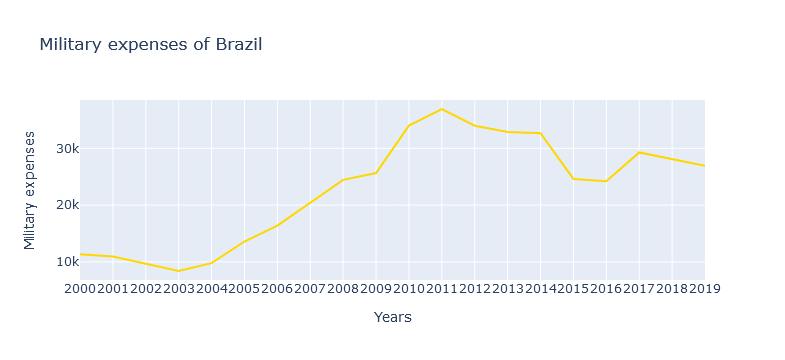

In [848]:
fig_Brazil = px.line(Brazil, x=Brazil.index.tolist(),
              y=Brazil.values.tolist(), 
              labels={"x":'Years', "y":'Military expenses'}, 
              title='Military expenses of Brazil', color_discrete_sequence=['gold'])
fig_Brazil.show()

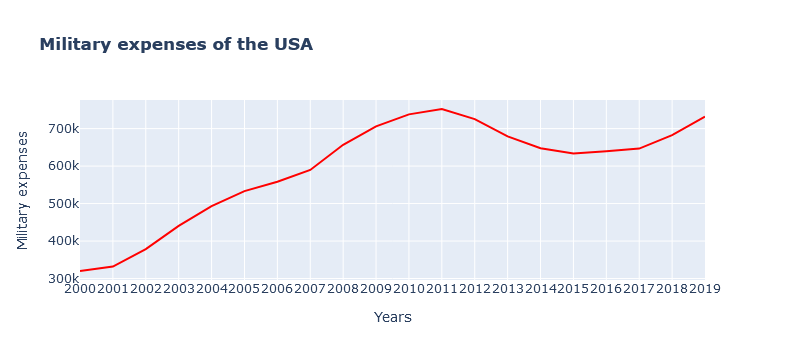

In [849]:
USA=country_index.loc['United States', :]

fig_USA = px.line(USA, x=USA.index.tolist(),
              y=USA.values.tolist(), 
              labels={"x":'Years', "y":'Military expenses'}, 
              title='<b>Military expenses of the USA</b>', color_discrete_sequence=['red'])
fig_USA.show()

#### Data preparation

In [850]:
military_2000_2019[military_2000_2019.Country=='United States']

Country      2000      2001      2002      2003      2004      2005  \
17  United States  320086.0  331806.0  378463.0  440532.0  492999.0  533203.0   

        2006      2007      2008  ...      2010      2011      2012      2013  \
17  558335.0  589586.0  656756.0  ...  738005.0  752288.0  725205.0  679229.0   

        2014      2015      2016      2017      2018      2019  
17  647789.0  633830.0  639856.0  646753.0  682491.0  731751.0  

[1 rows x 21 columns]

In [851]:
military_2000_2019[military_2000_2019.Country=='China']

Country     2000     2001     2002     2003     2004     2005     2006  \
3   China  22930.0  27875.0  32138.0  35126.0  40353.0  45729.0  55338.0   

      2007     2008  ...      2010      2011      2012      2013      2014  \
3  68011.0  86362.0  ...  115712.0  137967.0  157390.0  179880.0  200772.0   

       2015      2016      2017      2018      2019  
3  214471.0  216404.0  228466.0  253492.0  261082.0  

[1 rows x 21 columns]

In [852]:
USA_China_no=military_2000_2019.drop([17,3])

In [853]:
military_melt=\
USA_China_no.melt(id_vars=['Country'], 
                        value_name='Military_expenses',
                        var_name='Year')

military_melt.head(3)

Country  Year  Military_expenses
0  Australia  2000             7274.0
1     Brazil  2000            11344.0
2     Canada  2000             8299.0

In [854]:
military_melt['Year']=military_melt['Year'].astype(int)
military_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            320 non-null    object 
 1   Year               320 non-null    int32  
 2   Military_expenses  320 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 6.4+ KB


#### Mutiple time series line plots with annotations

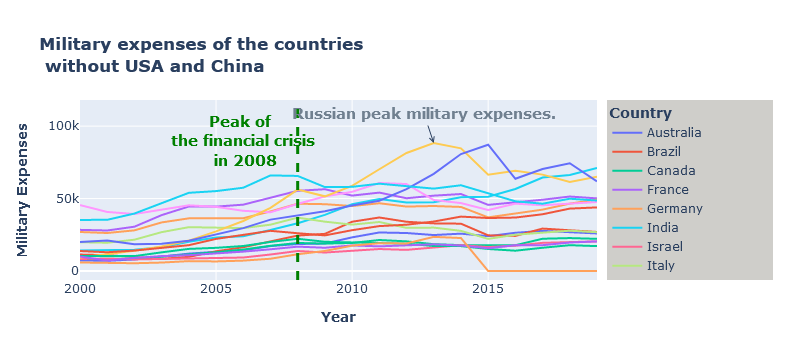

In [855]:
fig_first_10=px.line(military_melt, x='Year',
                     y='Military_expenses', color='Country',
                     title="<b>Military expenses of the countries <br> without USA and China</b>",
                     labels={'Year':'<b>Year</b>', 
                             'Military_expenses':'<b>Military Expenses</b>'})

russia_peak_annotation = \
{'x':2013, 'y':88353, 'showarrow':True, 'arrowhead':5, 
 'text':"<b>Russian peak military expenses.</b>",
 'font': {'size':15, 'color':'slategray'}}

financial_peak_annotation = \
{'x':2006, 'y':90000, 'showarrow':False, 
 'text':"<b>Peak of <br> the financial crisis <br> in 2008</b>",
 'font':{'size': 15, 'color':'green'}}

fig_first_10.update_layout({'legend':{'bgcolor':'rgb(207,206,202)'},
                            'legend_title':{'text':'<b>Country</b>'},
                            'annotations':[russia_peak_annotation, financial_peak_annotation]
                           })

fig_first_10.add_vline(x=2008, line_width=3, line_dash="dash", line_color="green")

fig_first_10.show()

In [856]:
military_melt=\
USA_China_no.melt(id_vars=['Country'], 
                        value_name='Military_expenses',
                        var_name='Year')

In [857]:
military_melt_2 = \
military_2000_2019.melt(id_vars=['Country'], value_name='Military_expenses', var_name='Year')

military_melt_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            360 non-null    object 
 1   Year               360 non-null    object 
 2   Military_expenses  360 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.6+ KB


#### Military expenses of all countries on a logarithmic y scale
<p>because the military defenses of the USA and China are vastly different than the rest of the other countries and could not plotted meaningful on the same graphic.</p>

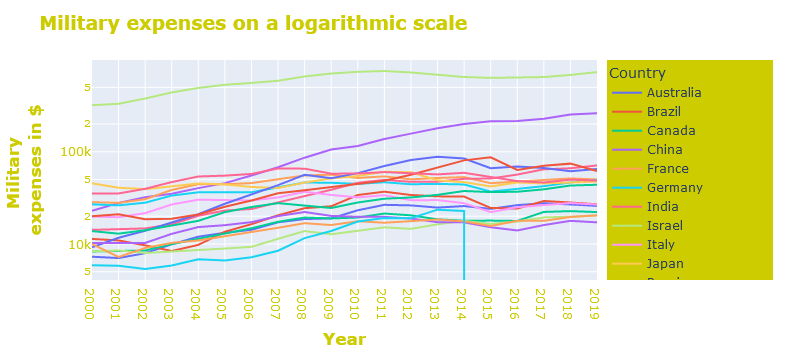

In [858]:
fig_all_militarycountries = \
px.line(data_frame=military_melt_2, x='Year', y='Military_expenses', color='Country', log_y=True)

fig_all_militarycountries.update_layout({'xaxis':{'title':{'text':'<b>Year</b>', 
                                                  'font':{'size':17, 'color':'rgb(204,204,0)'}},
                                                  'tickfont':{'color':'rgb(204,204,0)', 'size':13}},
                                         
                                        'yaxis':{'title':{'text':'<b>Military <br>expenses in $</b>',
                                                          'font':{'size':17, 'color':'rgb(204,204,0)'}},
                                                 'tickfont':{'color':'rgb(204,204,0)', 'size':13}},
                                        'title':{'text':'<b>Military expenses on a logarithmic scale</b>',
                                                  'font':{'color':'rgb(204,204,0)', 'size':19 }},
                                        'legend':{'bgcolor':'rgb(204,204,0)'}
                                        })

fig_all_militarycountries.show()

#### Doing calculations the military budgest

In [859]:
years_1=military_2000_2019.columns.tolist()
del years_1[0]
# years_1

#### Calculating column aggregates.

In [860]:
military_year_19=pd.DataFrame({'Budget': military_2000_2019[years_1].mean()})
military_year_19.head()

Budget
2000  34310.944444
2001  34878.166667
2002  38327.888889
2003  44300.444444
2004  49916.166667

In [861]:
military_2000_2019.iloc[0,1:15].mean()

16235.714285714286

#### Calculating row sums.
<p>with different methods.<br>
The first one is the most simple method.<br>
It does not apply iteration.
</p>


In [862]:
military_mean_country=military_2000_2019.mean(axis=1)
print(type(military_mean_country))

military_sum_country=military_2000_2019.sum(axis=1)
print(type(military_sum_country))

military_countries=military_2000_2019['Country']
print(type(military_countries))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [863]:
military_19_agg=\
pd.DataFrame({'Country': military_countries, 'Sum':military_sum_country,
              'Mean':military_mean_country})

military_19_agg.head()

Country        Sum       Mean
0  Australia   383956.0   19197.80
1     Brazil   454404.0   22720.20
2     Canada   330452.0   16522.60
3      China  2485142.0  124257.10
4     France   928013.0   46400.65

<p>This method uses numpy functions instead of pandas aggregate methods.<br>
It applies iteration.</p>

In [864]:
military_agg_df=\
pd.DataFrame()

In [865]:
nocountry=military_2000_2019.drop("Country", axis=1)
# nocountry

In [866]:
aggregates_1=[np.sum, np.mean, np.max, np.min, np.median, np.var, np.std]
rowsums_list=[military_countries]

In [867]:
for i in aggregates_1:
    rowsums=nocountry.apply(i, axis=1)
    rowsums_list.append(rowsums)

In [868]:
military_agg_df=pd.DataFrame()
column_agg_names=['Country', 'Sum', 'Mean', 'Max' , 'Min', 'Median', 'Variance', 'STD']
print(column_agg_names)
print(len(column_agg_names))

['Country', 'Sum', 'Mean', 'Max', 'Min', 'Median', 'Variance', 'STD']
8


In [869]:
for n,l in zip(column_agg_names, range(0, len(rowsums_list))):
               military_agg_df[n]=rowsums_list[l]
    

In [870]:
print(military_agg_df.shape)
military_agg_df.head()

(18, 8)


Country        Sum       Mean       Max      Min    Median      Variance  \
0  Australia   383956.0   19197.80   27691.0   7043.0   21089.0  5.324098e+07   
1     Brazil   454404.0   22720.20   36936.0   8393.0   24535.5  8.531182e+07   
2     Canada   330452.0   16522.60   22729.0   8299.0   17896.0  2.293797e+07   
3      China  2485142.0  124257.10  261082.0  22930.0  110678.0  6.605425e+09   
4     France   928013.0   46400.65   56441.0  27952.0   49657.5  7.070958e+07   

            STD  
0   7296.641876  
1   9236.440016  
2   4789.359826  
3  81273.764878  
4   8408.898604

<p>
This method for calculating rowsums with different pandas methods applies iteration
and uses string concatenation.<br>
It is creating an empty df, example:
</p>

In [871]:
p=pd.DataFrame({"Country":military_countries}, columns=['Country', 'sum', 'mean'])
print(p.head())

     Country  sum mean
0  Australia  NaN  NaN
1     Brazil  NaN  NaN
2     Canada  NaN  NaN
3      China  NaN  NaN
4     France  NaN  NaN


In [872]:
# These are the methods, which are applied on the data frame to calculate
# the row sums
methods_333=['sum', 'mean', 'max', 'min', 'median', 'var', 'std']

# This is the end result df
rowsums_333 = \
pd.DataFrame({'Country':military_countries},
               columns=['Country', 'Sum', 'Mean', 'Max' , 'Min', 'Median', 'Variance', 'STD'])

for i,m in enumerate(methods_333):
   
            # The methods are conactenated to the df-string
            # This results in a string, which cannot be executed.
            z = "military_2000_2019." + m + "(axis=1)"
            # The eval() function evaluates the specified expression,
            # if the expression is a legal Python statement, it will be executed."
            u = eval(z)
            rowsums_333.iloc[:,i+1]=u

In [873]:
print(rowsums_333.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   18 non-null     object 
 1   Sum       18 non-null     float64
 2   Mean      18 non-null     float64
 3   Max       18 non-null     float64
 4   Min       18 non-null     float64
 5   Median    18 non-null     float64
 6   Variance  18 non-null     float64
 7   STD       18 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.8+ KB
None


In [874]:
rowsums_333.head()

Country        Sum       Mean       Max      Min    Median      Variance  \
0  Australia   383956.0   19197.80   27691.0   7043.0   21089.0  5.604314e+07   
1     Brazil   454404.0   22720.20   36936.0   8393.0   24535.5  8.980192e+07   
2     Canada   330452.0   16522.60   22729.0   8299.0   17896.0  2.414523e+07   
3      China  2485142.0  124257.10  261082.0  22930.0  110678.0  6.953079e+09   
4     France   928013.0   46400.65   56441.0  27952.0   49657.5  7.443113e+07   

            STD  
0   7486.196607  
1   9476.387506  
2   4913.779502  
3  83385.123358  
4   8627.347932

<p>Do numpy functions and pandas methods deliver different results?</p>

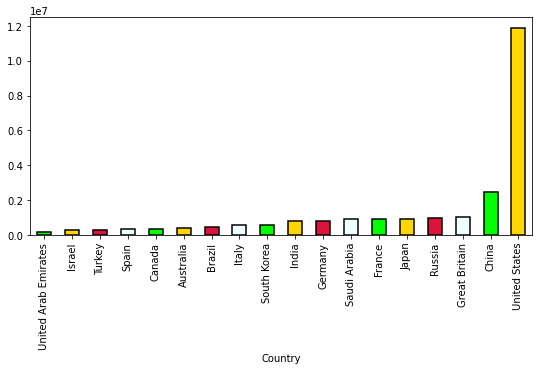

In [875]:
rowsums_333[['Country', 'Sum']].\
sort_values(by='Sum').plot.bar(x='Country', y='Sum', figsize=(9,4),
                              legend=False, color=['lime', 'gold', 'crimson', 'azure'],
                              edgecolor='black', linewidth=1.5)
plt.show()

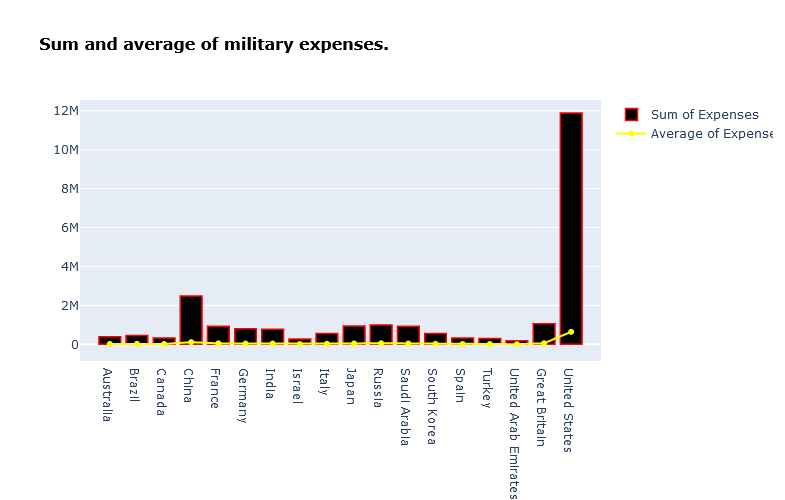

In [876]:
fig_123 = go.Figure()

fig_123.add_trace(go.Bar(x=rowsums_333['Country'], y=rowsums_333['Sum'], name="Sum of Expenses", 
                         marker_color=['black'], marker_line_color='red', 
                         marker_line_width=1.5))

fig_123.add_trace(go.Scatter(x=rowsums_333['Country'], y=rowsums_333['Median'], 
                             name="Average of Expenses",
                             marker_color='yellow'))

fig_123.update_layout({'autosize':None, 'height':500,
                       'title':{'text':'<b>Sum and average of military expenses.</b>',
                                'font':{'size':16, 'color':'black'}}})
fig_123.show()

In [877]:
australia_expenses=military_melt[military_melt['Country'] == 'Australia']
india_expenses=military_melt[military_melt['Country'] == 'India']
britain_expenses=military_melt[military_melt['Country'] == 'Great Britain']
russia_expenses=military_melt[military_melt['Country'] == 'Russia']
spain_expenses=military_melt[military_melt['Country'] == 'Spain']

In [878]:
military_expenses_year = military_melt.groupby('Year').mean().reset_index()
military_expenses_year.head(3)


Year  Military_expenses
0  2000         17161.3125
1  2001         16757.8750
2  2002         17456.3125

#### Layered plot of military expenses
<p>Plotly graphic objects have not a color or group argument other than plotly express.</b>

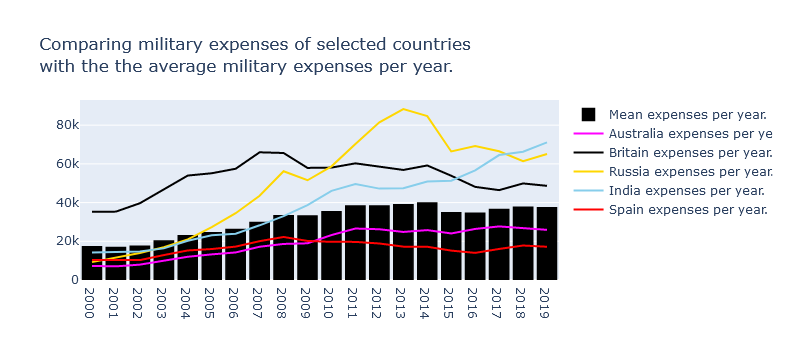

In [879]:
fig_777 = go.Figure()

fig_777.add_trace(go.Bar(x=military_expenses_year['Year'], 
                         y=military_expenses_year['Military_expenses'], 
                         name="Mean expenses per year.", 
                         marker_color=['black'], marker_line_color='black', 
                         marker_line_width=1.5))

fig_777.add_trace(go.Scatter(x=australia_expenses['Year'], 
                             y=australia_expenses['Military_expenses'], 
                             name="Australia expenses per year.",
                             marker_color='magenta', 
                             marker_line_width=1.5))

fig_777.add_trace(go.Scatter(x=britain_expenses['Year'], 
                             y=britain_expenses['Military_expenses'], 
                             name="Britain expenses per year.",
                             marker_color='black', 
                             marker_line_width=1.5))

fig_777.add_trace(go.Scatter(x=russia_expenses['Year'], 
                             y=russia_expenses['Military_expenses'], 
                             name="Russia expenses per year.",
                             marker_color='gold', 
                             marker_line_width=1.5))

fig_777.add_trace(go.Scatter(x=india_expenses['Year'], 
                             y=india_expenses['Military_expenses'], 
                             name="India expenses per year.",
                             marker_color='skyblue', 
                             marker_line_width=1.5))

fig_777.add_trace(go.Scatter(x=spain_expenses['Year'], 
                             y=spain_expenses['Military_expenses'], 
                             name="Spain expenses per year.",
                             marker_color='red', 
                             marker_line_width=1.5))

fig_777.update_layout({'title':'Comparing military expenses of selected countries<br>with the the average military expenses per year.' })

fig_777.show()

In [880]:
print(military_melt.shape)
print(military_melt.Country.unique())
print(len(military_melt.Country.unique()))
military_melt.columns
military_melt.head()

(320, 3)
['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Israel' 'Italy'
 'Japan' 'Russia' 'Saudi Arabia' 'South Korea' 'Spain' 'Turkey'
 'United Arab Emirates' 'Great Britain']
16


Country  Year  Military_expenses
0  Australia  2000             7274.0
1     Brazil  2000            11344.0
2     Canada  2000             8299.0
3     France  2000            28403.0
4    Germany  2000            26925.0

In [881]:
n_rows=len(military_melt.Country.unique())
country_list=military_melt.Country.unique().tolist()

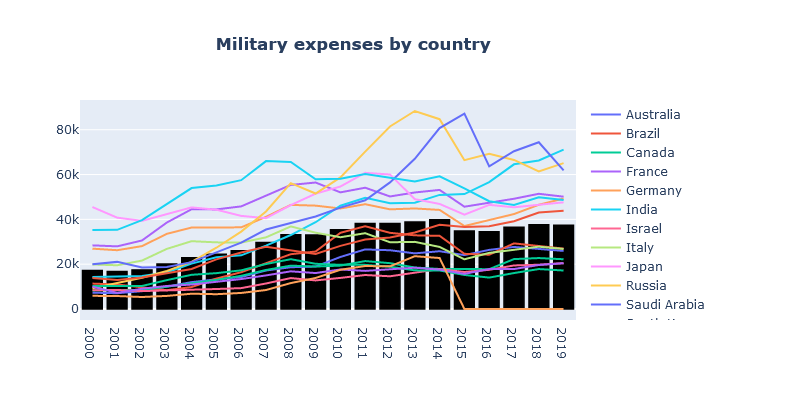

In [882]:
fig_233=go.Figure()

row_num=1

for country in country_list:
    country_expenses=military_melt[military_melt['Country'] == country]
    # print(country_expenses)
    fig_233.add_trace(go.Scatter(x=country_expenses['Year'], 
                         y=country_expenses['Military_expenses'], 
                         name= country, 
                         marker_line_width=2))
     
    row_num +=1

fig_233.update_layout({'autosize':False, 'height':400, 'width':800, 
                        'title_x':0.45,
                        'title_text':"<b>Military expenses by country</b>",
                        'title_xanchor':'center'})

fig_233.add_trace(go.Bar(x=military_expenses_year['Year'], 
                         y=military_expenses_year['Military_expenses'], 
                         name="Mean expenses per year.", 
                         marker_color=['black'], marker_line_color='black', 
                         marker_line_width=1.5))
    
fig_233.show()

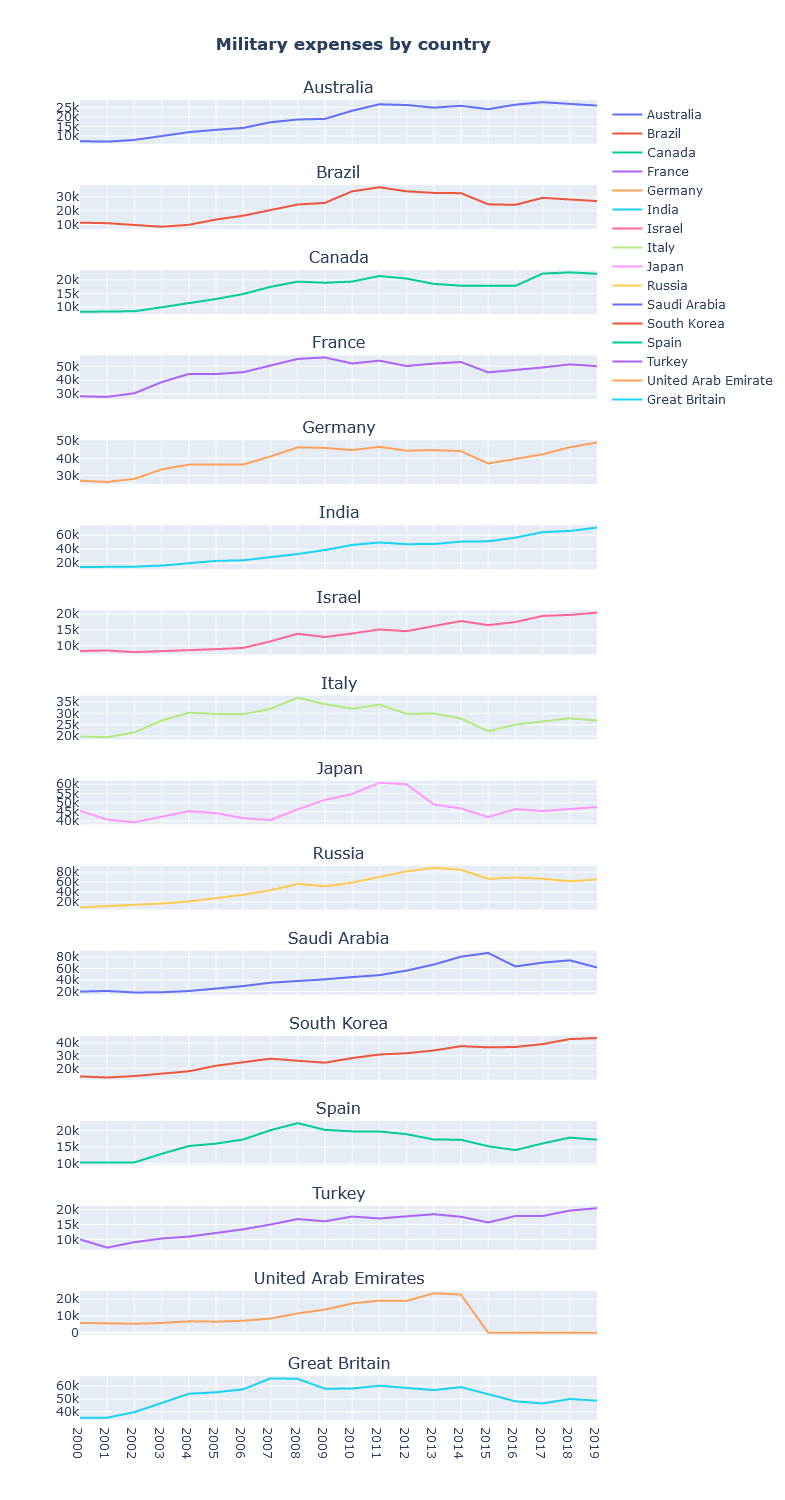

In [883]:
fig_555=make_subplots(rows=n_rows , cols=1, shared_xaxes=True,
                     subplot_titles=country_list)

row_num=1

for country in country_list:
    country_expenses=military_melt[military_melt['Country'] == country]
    # print(country_expenses)
    fig_555.add_trace(go.Scatter(x=country_expenses['Year'], 
                         y=country_expenses['Military_expenses'], 
                         name= country, 
                         marker_line_width=1),
                         row=row_num, col=1)
     
    row_num +=1

fig_555.update_layout({'autosize':False, 'height':1500, 'width':700, 
                        'title_x':0.45,
                        'title_text':"<b>Military expenses by country</b>",
                        'title_xanchor':'center'})
    
fig_555.show()

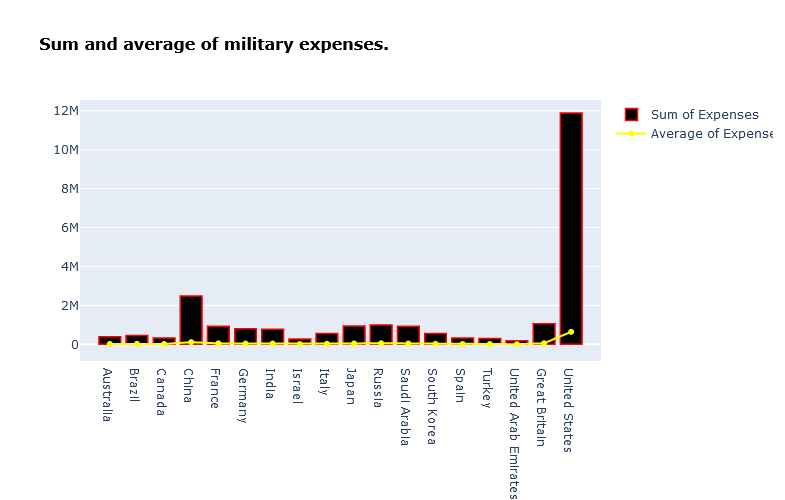

In [884]:
fig_777 = go.Figure()

fig_777.add_trace(go.Bar(x=rowsums_333['Country'], y=rowsums_333['Sum'], name="Sum of Expenses", 
                         marker_color=['black'], marker_line_color='red', 
                         marker_line_width=1.5))

fig_777.add_trace(go.Scatter(x=rowsums_333['Country'], y=rowsums_333['Median'], 
                             name="Average of Expenses",
                             marker_color='yellow'))

fig_777.update_layout({'autosize':None, 'height':500,
                       'title':{'text':'<b>Sum and average of military expenses.</b>',
                                'font':{'size':16, 'color':'black'}}})
fig_777.show()

### List of largest companies by revenue

<p><a href=""https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue"" target="_blank">Wikipedia</a> <7p>

In [885]:
companies="https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue"
companies_response=requests.get(companies)
companies_text=companies_response.text
companies_soup=BeautifulSoup(companies_text, "html.parser")
companies_tables=\
companies_soup.find_all('table')
companies_tables_list=pd.read_html(str(companies_tables))
companies_tables_0 = companies_tables_list[0]


#### Data infos

In [886]:
companies_text[:300]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of largest companies by revenue - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":'

In [887]:
companies_tables_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   (Rank, Rank)                                  50 non-null     int64 
 1   (Name, Name)                                  50 non-null     object
 2   (Industry, Industry)                          50 non-null     object
 3   (Revenue, USD Millions)                       50 non-null     object
 4   (Profit, USD Millions)                        50 non-null     object
 5   (Employees, Employees)                        50 non-null     int64 
 6   (Headquarters[note 1], Headquarters[note 1])  50 non-null     object
 7   (Ref, Ref)                                    50 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.2+ KB


In [888]:
companies_tables_0.head(2)

Rank        Name     Industry      Revenue       Profit Employees  \
  Rank        Name     Industry USD Millions USD Millions Employees   
0    1     Walmart       Retail     $559,151      $13,600   2300000   
1    2  State Grid  Electricity     $386,618       $5,580    896360   

  Headquarters[note 1]  Ref  
  Headquarters[note 1]  Ref  
0        United States  [4]  
1                China  [5]

#### Data cleaning

<p>This is a multiindex, which is here not useful.</p>

In [889]:
print(type(companies_tables_0.columns))
companies_tables_0.columns

<class 'pandas.core.indexes.multi.MultiIndex'>


MultiIndex([(                'Rank',                 'Rank'),
            (                'Name',                 'Name'),
            (            'Industry',             'Industry'),
            (             'Revenue',         'USD Millions'),
            (              'Profit',         'USD Millions'),
            (           'Employees',            'Employees'),
            ('Headquarters[note 1]', 'Headquarters[note 1]'),
            (                 'Ref',                  'Ref')],
           )

In [890]:
companies_tables_0.columns.levels

FrozenList([['Employees', 'Headquarters[note 1]', 'Industry', 'Name', 'Profit', 'Rank', 'Ref', 'Revenue'], ['Employees', 'Headquarters[note 1]', 'Industry', 'Name', 'Rank', 'Ref', 'USD Millions']])

In [891]:
companies_tables_0.columns = companies_tables_0.columns.droplevel(0)

In [892]:
cols_list=companies_tables_0.columns.tolist()
cols_list

['Rank',
 'Name',
 'Industry',
 'USD Millions',
 'USD Millions',
 'Employees',
 'Headquarters[note 1]',
 'Ref']

In [893]:
cols_list[3]='Revenue'
cols_list[4]='Profit'

In [894]:
companies_tables_0.columns=cols_list

In [895]:
companies_df = companies_tables_0.copy()

In [896]:
companies_df.drop('Ref', axis=1, inplace=True)

In [897]:
companies_df.rename(columns={'Headquarters[note 1]':'Headquarters'}, inplace=True)

<p>Revenue and profit are here in USD Millions.</p>

In [898]:
companies_df.head(2)

Rank        Name     Industry   Revenue   Profit  Employees   Headquarters
0     1     Walmart       Retail  $559,151  $13,600    2300000  United States
1     2  State Grid  Electricity  $386,618   $5,580     896360          China

In [899]:
companies_df['Revenue']=\
companies_df['Revenue'].str.replace("$","", regex=False).str.replace(",", ".", regex=False).str.strip()

In [900]:
companies_df['Profit']=\
companies_df['Profit'].str.replace("$","", regex=False).str.replace(",", ".", regex=False).str.strip()

In [901]:
companies_df[['Revenue','Profit']]=companies_df[['Revenue','Profit']].astype(float)

In [902]:
print(companies_df.info())
companies_df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          50 non-null     int64  
 1   Name          50 non-null     object 
 2   Industry      50 non-null     object 
 3   Revenue       50 non-null     float64
 4   Profit        50 non-null     float64
 5   Employees     50 non-null     int64  
 6   Headquarters  50 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ KB
None


Rank                      Name                        Industry  Revenue  \
0     1                   Walmart                          Retail  559.151   
1     2                State Grid                     Electricity  386.618   
2     3                    Amazon  Retail, Information Technology  386.064   
3     4  China National Petroleum                     Oil and gas  283.958   

   Profit  Employees   Headquarters  
0  13.600    2300000  United States  
1   5.580     896360          China  
2  21.331    1335000  United States  
3   4.575    1242245          China

<p>Profit seems high.</p>

In [903]:
companies_df[companies_df['Name']=='Walgreens Boots Alliance']

Rank                      Name Industry  Revenue  Profit  Employees  \
35    36  Walgreens Boots Alliance   Retail  139.537   456.0     450000   

     Headquarters  
35  United States

In [904]:
companies_df.loc[35, 'Profit'] = 4.56

In [905]:
companies_df.to_csv("csv/companies.csv", sep=",", index=True)

#### Data visualization

<p><b>Layered plot</b> of revenue and profit.</p>

In [906]:
median_revenue=np.repeat(companies_df.Revenue.median(), companies_df.Name.shape[0])

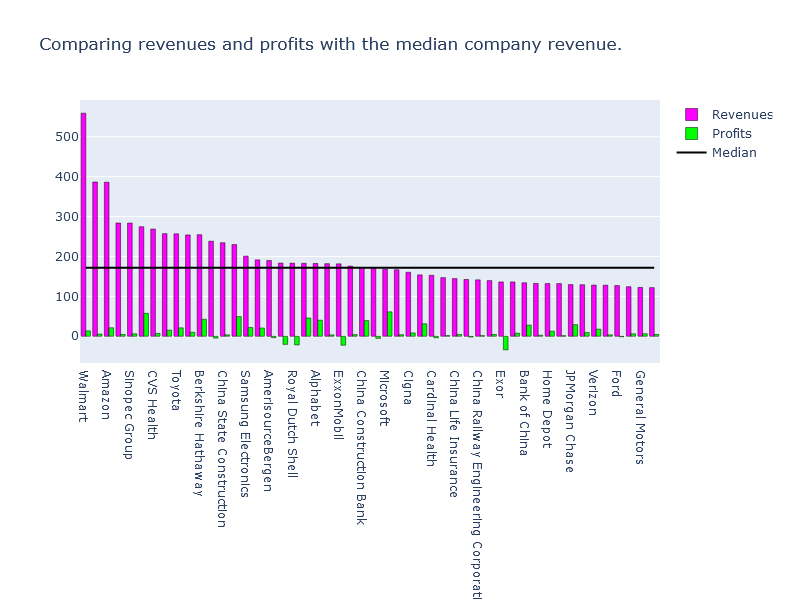

In [907]:
fig_companies_df = go.Figure()

fig_companies_df.add_trace(go.Bar(x=companies_df['Name'], 
                                  y=companies_df['Revenue'], name="Revenues", 
                                  marker_color='magenta',
                                  hovertext='Revenue'))

fig_companies_df.add_trace(go.Bar(x=companies_df['Name'], 
                                  y=companies_df['Profit'], name="Profits", 
                                  marker_color='lime', 
                                  hovertext='Profit'))

fig_companies_df.add_trace(go.Scatter(x=companies_df['Name'], 
                                      y=median_revenue, name="Median", 
                                      marker_color='black', 
                                      marker_line_width=40,
                                      hovertext='Median revenue'))

fig_companies_df.update_layout(autosize=False, width=900, height=600, 
                               title=dict(text="Comparing revenues and profits with the median company revenue."))
fig_companies_df.update_traces(marker_line_width=0.5, marker_line_color='black')

fig_companies_df.show()

#### Making subplots

In [908]:
companies_df['Industry'].unique().tolist()

['Retail',
 'Electricity',
 'Retail, Information Technology',
 'Oil and gas',
 'Electronics',
 'Healthcare',
 'Automotive',
 'Financials',
 'Construction',
 'Information technology',
 'Telecommunications',
 'Commodities',
 'Insurance',
 'Holding company']

In [909]:
industr_vc = companies_df['Industry'].value_counts(normalize=True).sort_values()
industr_vc

Holding company                   0.02
Insurance                         0.02
Retail, Information Technology    0.02
Electricity                       0.02
Information technology            0.04
Commodities                       0.04
Telecommunications                0.04
Construction                      0.06
Electronics                       0.08
Retail                            0.10
Oil and gas                       0.12
Automotive                        0.12
Healthcare                        0.14
Financials                        0.18
Name: Industry, dtype: float64

In [910]:
names_selected_industries=industr_vc.index.tolist()[-4:len(industr_vc.index)]
names_selected_industries

['Oil and gas', 'Automotive', 'Healthcare', 'Financials']

In [911]:
automotive=companies_df.groupby('Industry').get_group('Automotive')
oil=companies_df.groupby('Industry').get_group('Oil and gas')
health=companies_df.groupby('Industry').get_group('Healthcare')
financials=companies_df.groupby('Industry').get_group('Financials')

financials.head(3)

Rank                Name    Industry  Revenue  Profit  Employees  \
10    11  Berkshire Hathaway  Financials  254.510  42.521     360000   
15    16   Ping An Insurance  Financials  191.509  20.739     362035   
19    20                ICBC  Financials  182.794  45.783     439787   

     Headquarters  
10  United States  
15          China  
19          China

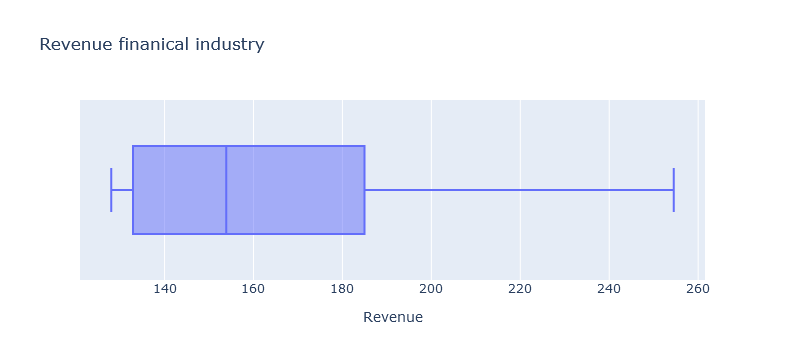

In [912]:
fig_32312 = px.box(financials, x='Revenue', height=300, width=500, 
                   title='Revenue finanical industry')
fig_32312.show()

#### Subplot of selected industry revenues
<p>created "manually" without looping.</p>

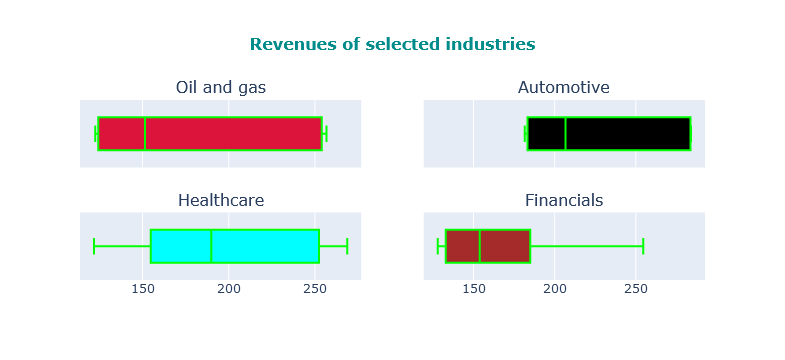

In [913]:
from plotly.subplots import make_subplots

fig_industries =\
make_subplots(rows=2, cols=2, subplot_titles=names_selected_industries,
              shared_xaxes=True)

fig_industries.add_trace(go.Box(x=automotive.Revenue, name='', showlegend=False, 
                                fillcolor='crimson'), row=1, col=1)

fig_industries.add_trace(go.Box(x=oil.Revenue, name='', showlegend=False, 
                                fillcolor='black'), row=1, col=2)

fig_industries.add_trace(go.Box(x=health.Revenue, name='', showlegend=False, 
                                fillcolor='aqua'), row=2, col=1)

fig_industries.add_trace(go.Box(x=financials.Revenue, name='', showlegend=False, 
                                fillcolor='brown'), row=2, col=2)

fig_industries.update_traces({'line':{'color':'lime'}})
fig_industries.update_layout({'title':{'text':"<b>Revenues of selected industries</b>",
                                      'x':0.5, 'font':{'size':16, 'color':'darkcyan'}}})

fig_industries.show()

<p>Select again industries, but now store those in one data frame instead of several small ones.</b>

In [914]:
df_list = []
industries_selected_2=\
['Automotive', 'Oil and gas',  'Healthcare', 'Financials', 'Information technology', 'Commodities']

for industry in industries_selected_2:
    i=companies_df.groupby('Industry').get_group(industry)
    df_list.append(i)
    df_concat_23=pd.concat(df_list)
    

In [915]:
print(df_concat_23.Industry.unique())
df_concat_23.info()

['Automotive' 'Oil and gas' 'Healthcare' 'Financials'
 'Information technology' 'Commodities']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 8 to 33
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          32 non-null     int64  
 1   Name          32 non-null     object 
 2   Industry      32 non-null     object 
 3   Revenue       32 non-null     float64
 4   Profit        32 non-null     float64
 5   Employees     32 non-null     int64  
 6   Headquarters  32 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ KB


<p>Same with a list comprehension.</p>

In [916]:
df_concat_23_list_comprehension=\
pd.concat([companies_df.groupby('Industry').get_group(industry) 
           for industry in industries_selected_2])

df_concat_23_list_comprehension.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 8 to 33
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          32 non-null     int64  
 1   Name          32 non-null     object 
 2   Industry      32 non-null     object 
 3   Revenue       32 non-null     float64
 4   Profit        32 non-null     float64
 5   Employees     32 non-null     int64  
 6   Headquarters  32 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ KB


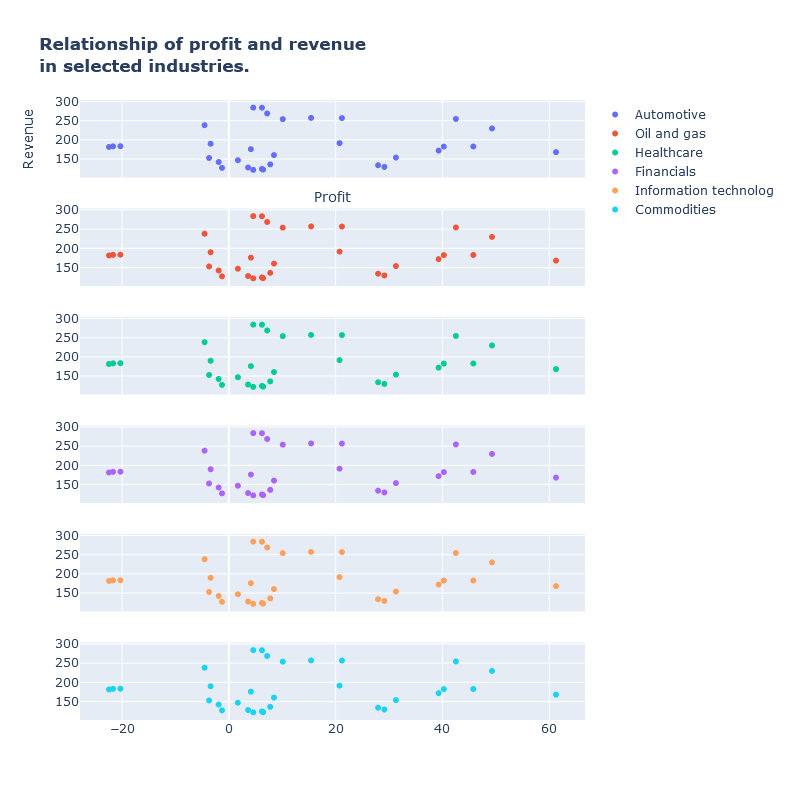

In [917]:
industries_selected_2=\
['Automotive', 'Oil and gas',  'Healthcare', 'Financials', 'Information technology', 'Commodities']

fig_1111=make_subplots(rows=len(industries_selected_2), cols=1,
                       shared_xaxes=True, shared_yaxes=True)

row_num=1

for industry in industries_selected_2:
    # print(industry)
    df = df_concat_23[df_concat_23['Industry']==industry]
    # print(df)
    fig_1111.add_trace(go.Scatter(x=df_concat_23['Profit'],
                       y=df_concat_23['Revenue'],
                       name=industry, mode='markers'),
                       row=row_num, col=1)
    row_num += 1
       
fig_1111.update_layout(autosize=False, height=800, 
                       title=dict(text='<b>Relationship of profit and revenue<br>in selected industries.</b>'),
                       xaxis=dict(title='Profit'), yaxis=dict(title='Revenue'))

fig_1111.update_traces(hovertext=df_concat_23['Name'])
        
fig_1111.show() 

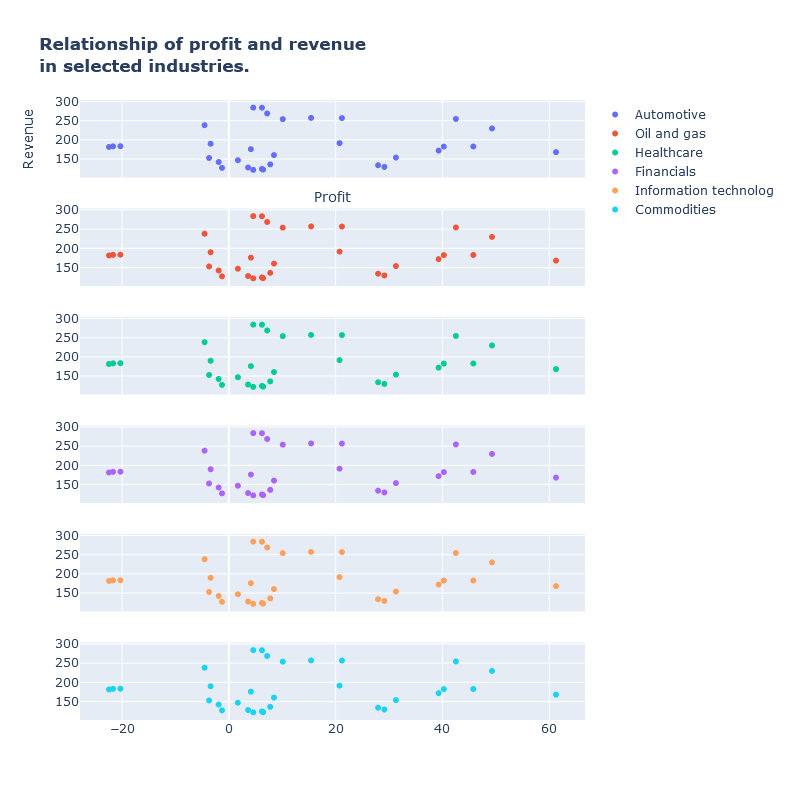

In [918]:
fig_1111=make_subplots(rows=len(industries_selected_2), cols=1,
                       shared_xaxes=True, shared_yaxes=True)

row_num=1

for industry in industries_selected_2:
    # print(industry)
    df = df_concat_23[df_concat_23['Industry']==industry]
    # print(df)
    fig_1111.add_trace(go.Scatter(x=df_concat_23['Profit'],
                       y=df_concat_23['Revenue'],
                       name=industry, mode='markers'),
                       row=row_num, col=1)
    row_num += 1
       
fig_1111.update_layout(autosize=False, height=800, 
                       title=dict(text='<b>Relationship of profit and revenue<br>in selected industries.</b>'),
                       xaxis=dict(title='Profit'), yaxis=dict(title='Revenue'))

fig_1111.update_traces(hovertext=df_concat_23['Name'])
        
fig_1111.show() 

#### Relationships between two and more variables

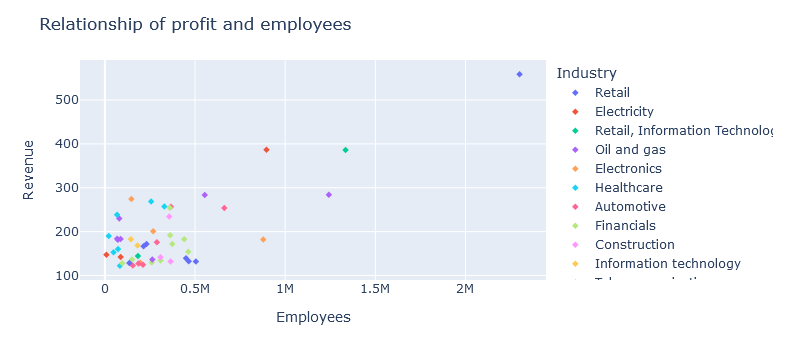

In [919]:
fig_companies_scatter=\
px.scatter(data_frame=companies_df, x='Employees', y='Revenue', color='Industry',
           hover_data=['Name', 'Industry', 'Revenue', 'Profit'], hover_name='Name')
fig_companies_scatter.update_layout({'title':{'text':'Relationship of profit and employees'}})
fig_companies_scatter.update_traces(marker_size=5, marker_symbol='diamond')
fig_companies_scatter.show()

#### Correlations and heatmaps

In [920]:
companies_correlations=companies_df.corr(method='pearson')
companies_correlations

Rank   Revenue    Profit  Employees
Rank       1.000000 -0.828484 -0.194071  -0.461244
Revenue   -0.828484  1.000000  0.158935   0.775741
Profit    -0.194071  0.158935  1.000000   0.083728
Employees -0.461244  0.775741  0.083728   1.000000

In [921]:
companies_corrs_list=companies_correlations.values.tolist()
companies_corrs_list[:2]

[[1.0, -0.8284840366572415, -0.19407093095564676, -0.46124366338082007],
 [-0.8284840366572415, 1.0, 0.15893494595790245, 0.7757408746837935]]

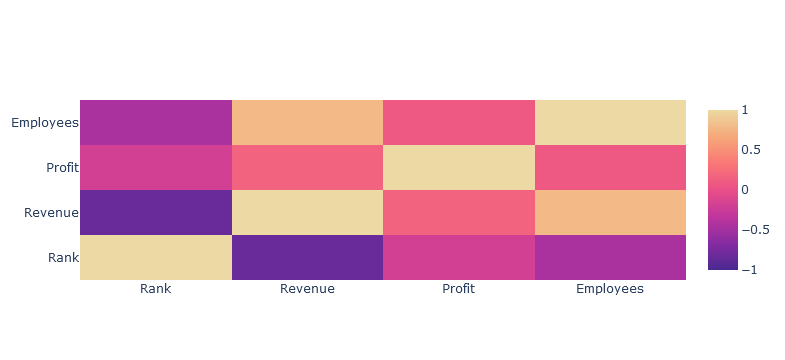

In [922]:
fig_companies_heatmap=\
go.Figure(go.Heatmap(
          z=companies_corrs_list,
          x=companies_correlations.columns,
          y=companies_correlations.columns,
          colorscale='agsunset',
          zmin=-1, zmax=1
))


fig_companies_heatmap.update_layout(autosize=False, height=300, width=600)

fig_companies_heatmap.show()

#### Importing finance data
<p>
with an Python package build on API's instead of web scraping.<br>
Web scraping finance data tables is not easy as the tables are hidden behind javascripts.<br>
Two of the most popular sites are Yahoo Finance and Quandl.<br>
Pandas data reader gets a variety of financial sources.<br>
<a href="https://pandas-datareader.readthedocs.io/en/latest/" target="_blank">pandas-datareader</a> 
</p>


<p>
Using Microsoft or Apple is so boring.<br>
So I am choosing Alibaba instead.
</p>

In [923]:
# import yfinance as yf
baba= yf.Ticker("BABA")

<p>This returns a class object.</p>

In [924]:
print(type(baba))
baba

<class 'yfinance.ticker.Ticker'>


yfinance.Ticker object <BABA>

In [925]:
print(type(baba.info))
print(len(baba.info))

<class 'dict'>
152


<p>Info returns a dict, I want to look into.</p>

In [926]:
# import itertools
print(list(baba.info.keys())[:10])
print(dict(itertools.islice(baba.info.items(), 3)))

['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'country', 'companyOfficers', 'website', 'maxAge']
{'zip': '311121', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 254702}


In [927]:
baba_history=baba.history(period='max')

In [928]:
print(type(baba_history))

<class 'pandas.core.frame.DataFrame'>


In [929]:
print(baba_history.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1753 entries, 2014-09-19 to 2021-09-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1753 non-null   float64
 1   High          1753 non-null   float64
 2   Low           1753 non-null   float64
 3   Close         1753 non-null   float64
 4   Volume        1753 non-null   int64  
 5   Dividends     1753 non-null   int64  
 6   Stock Splits  1753 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 109.6 KB
None


In [930]:
baba_history.head(2)

Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2014-09-19  92.699997  99.699997  89.949997  93.889999  271879400          0   
2014-09-22  92.699997  92.949997  89.500000  89.889999   66657800          0   

            Stock Splits  
Date                      
2014-09-19             0  
2014-09-22             0

In [931]:
baba_open=baba_history['Open'].reset_index()
baba_open.info()
baba_open['Date'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1753 non-null   datetime64[ns]
 1   Open    1753 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.5 KB


Timestamp('2021-09-03 00:00:00')

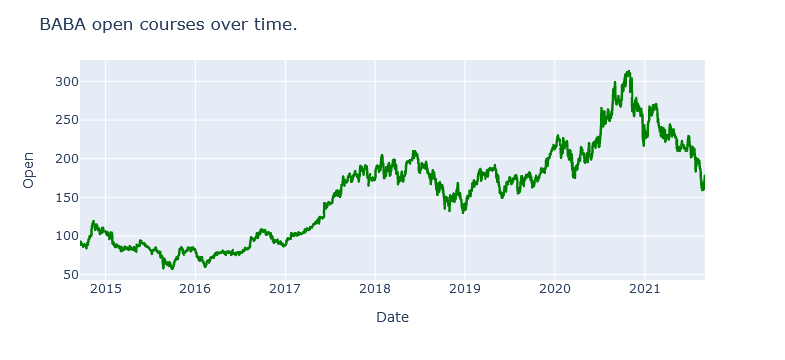

In [932]:
fig_baba_line = px.line(baba_open, x='Date', y='Open')
fig_baba_line.update_layout({'title':{'text':'BABA open courses over time.'}})
fig_baba_line.update_traces(line={'color':'green', 'width':2.5})
fig_baba_line.show()

In [933]:
uno_incident=baba_open.loc[baba_open['Date']==dt.datetime(2020,1,6,0,0,0)]
uno_incident_open=float(uno_incident['Open'])


print(uno_incident)
print(type(uno_incident_open))
print(uno_incident_open)

           Date        Open
1332 2020-01-06  214.889999
<class 'float'>
214.88999938964844


In [934]:
jackma=float(baba_open.loc[baba_open['Date']=='2020-11-02', 'Open'])
print(jackma)

310.95001220703125


In [935]:
covid_fisthospitalizations=\
{'x':'2019-12-08 00:00:00', 'y':200,
'showarrow':True, 'arrowhead':6,'arrowcolor':'red', 'arrowwidth':2,
'text':"<b>First Covid<br>hospitalizations</b>",
'yanchor':'bottom',
'font':{'size':12, 'color':'rgb(164,54,160)'}}

covid_UNO=\
{'x':'2020-01-04 00:00:00', 'y':uno_incident_open,
'showarrow':True, 'arrowhead':6,'arrowcolor':'red', 'arrowwidth':2,
'standoff':5,
'text':"<b>UNO activates <br>incident-management</b>",
'yanchor':'bottom', 'yshift':20, 'xshift':-0.1,
'font':{'size':12, 'color':'rgb(164,54,160)'}}

jackma_annotation=\
{'x':'2020-11-02 00:00:00', 'y':jackma,
'showarrow':True, 'arrowhead':6, 'arrowcolor':'red', 'arrowwidth':5,
'standoff':5,
'text':"<b>Jack Ma vanishes.</b>",
'yanchor':'bottom', 'yshift':0, 'xshift':0.2,
'font':{'size':12, 'color':'rgb(164,54,160)'}}



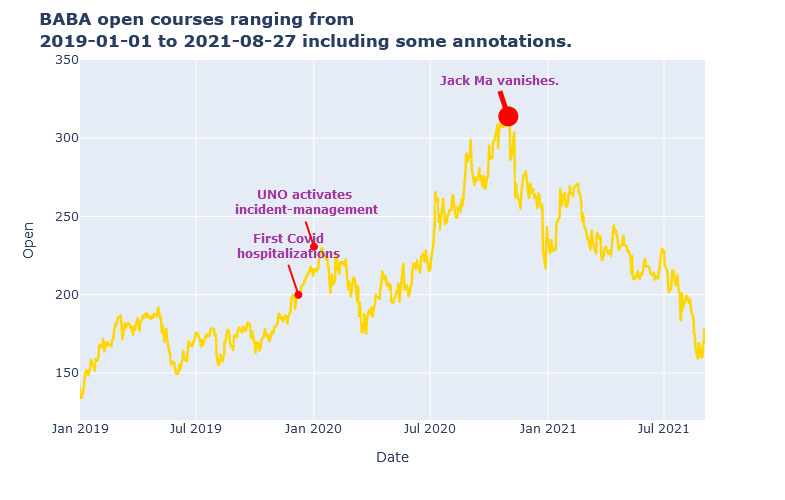

In [936]:
fig_baba_line_2 = px.line(baba_open, x='Date', y='Open', height=500)
fig_baba_line_2.update_layout({'title':{'text':'<b>BABA open courses ranging from<br>2019-01-01 to 2021-08-27 including some annotations.</b>',
                                        'y':0.95},
                               'xaxis':{'range':['2019-01-01 00:00:00', baba_open['Date'].max()]},
                               'yaxis':{'range':[120,350]},
                               'annotations':[covid_fisthospitalizations, 
                                              covid_UNO, 
                                              jackma_annotation]})
fig_baba_line_2.update_traces(line={'color':'gold', 'width':2.5})
fig_baba_line_2.show()

In [937]:
baba_history_datecol=baba_history.reset_index(drop=False, inplace=False)
# baba_history_datecol.head(2)

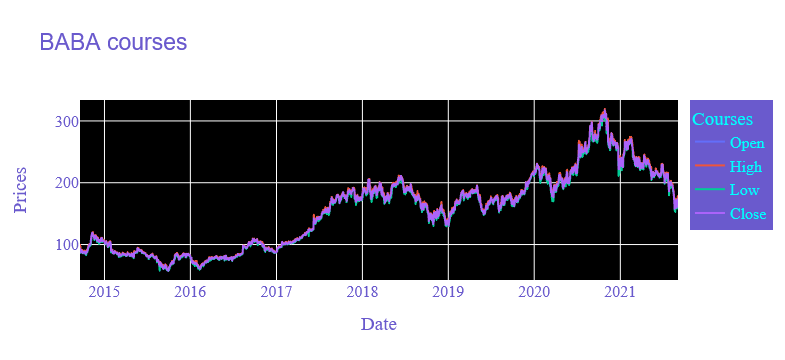

In [938]:
fig_baba_line_2 = px.line(baba_history_datecol, x='Date', y=['Open', 'High', 'Low', 'Close'],
                         title="BABA courses", labels={'value':'Prices'})

fig_baba_line_2.update_layout({'title':{'text':'<b>BABA open courses over time.</b>'}, 
                               'legend':{'font':{'family':'Times New Roman', 'color':'aqua'},
                                        'bgcolor':'slateblue'},
                               'legend_title':{'text':'Courses', 
                                               'font':{'color':'aqua'}},
                               'font':{'family':"Droid Sans Mono", 'color':'slateblue', 'size':16},
                               'title':{'font':{'family':'Arial', 'color':'slateblue', 'size':23}},
                               'plot_bgcolor':'black'
                                })

fig_baba_line_2.show()

<p>Not any dividends.</p>

In [939]:
baba.dividends

Series([], Name: Dividends, dtype: int64)

In [940]:
baba_financials=baba.financials

print(type(baba_financials))
baba_financials.tail()

<class 'pandas.core.frame.DataFrame'>


2021-03-31      2020-03-31  \
Cost Of Revenue                         419517000000.0  279713000000.0   
Total Other Income Expense Net           62968000000.0   65378000000.0   
Discontinued Operations                           None            None   
Net Income From Continuing Ops          143284000000.0  140350000000.0   
Net Income Applicable To Common Shares  150308000000.0  149263000000.0   

                                            2019-03-31      2018-03-31  
Cost Of Revenue                         204086000000.0  106243000000.0  
Total Other Income Expense Net           35181000000.0    9002000000.0  
Discontinued Operations                           None            None  
Net Income From Continuing Ops           80234000000.0   61412000000.0  
Net Income Applicable To Common Shares   87600000000.0   63985000000.0

In [941]:
baba.major_holders

0                                      1
0  26.40%        % of Shares Held by All Insider
1  27.22%       % of Shares Held by Institutions
2  36.98%        % of Float Held by Institutions
3    2763  Number of Institutions Holding Shares

<p>Top 5 are not Chinese.</p>

In [942]:
baba.institutional_holders.sort_values(by='Shares', ascending=False)[:5]

Holder    Shares Date Reported   % Out  \
0         Price (T.Rowe) Associates Inc  34479580    2021-06-29  0.0127   
1             Goldman Sachs Group, Inc.  30501900    2021-06-29  0.0112   
2           Baillie Gifford and Company  25732092    2021-06-29  0.0095   
3     Norges Bank Investment Management  24548114    2020-12-30  0.0090   
4  Schroder Investment Management Group  22592987    2021-06-29  0.0083   

        Value  
0  7819279152  
1  6917220882  
2  5835523823  
3  5713082571  
4  5123637591

In [943]:
# options experation dates
baba.options[:5]

('2021-09-10', '2021-09-17', '2021-09-24', '2021-10-01', '2021-10-08')